<a href="https://colab.research.google.com/github/Dixonalexmg/TelecomX---Alura-Latam/blob/main/TelecomX_LATAM_Dixon_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [6]:

# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from pandas import json_normalize
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Dependencias instaladas y librerías importadas exitosamente!")

# Descargar y cargar datos JSON desde GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

print("📥 Descargando dataset desde GitHub...")
try:
    response = requests.get(url)
    response.raise_for_status()  # Lanzar excepción para códigos de estado malos

    # Parsear datos JSON
    json_data = response.json()

    # Normalizar JSON a DataFrame
    df = json_normalize(json_data)

    print(f"✅ Dataset cargado exitosamente!")
    print(f"📊 Forma del dataset: {df.shape}")
    print(f"📝 Columnas encontradas: {len(df.columns)}")

except Exception as e:
    print(f"❌ Error cargando dataset: {str(e)}")
    print("Por favor verifica tu conexión a internet y la URL")

    # Exploración inicial de datos
print("=" * 50)
print("RESUMEN DEL DATASET")
print("=" * 50)

print("\n📋 Primeras 5 filas:")
display(df.head())

print("\n📋 Información del dataset:")
df.info()

print(f"\n📋 Forma del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"\n📋 Uso de memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



✅ Dependencias instaladas y librerías importadas exitosamente!
📥 Descargando dataset desde GitHub...
✅ Dataset cargado exitosamente!
📊 Forma del dataset: (7267, 21)
📝 Columnas encontradas: 21
RESUMEN DEL DATASET

📋 Primeras 5 filas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport

#🔧 Transformación

In [7]:
# Mapeo de columnas para formato estándar
column_mapping = {
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}

# Renombrar columnas
df = df.rename(columns=column_mapping)

print("✅ Columnas renombradas exitosamente!")
print(f"📋 Nuevas columnas: {list(df.columns)}")

# Exploración de tipos de datos y estructura
print("=" * 60)
print("EXPLORACIÓN DE COLUMNAS Y TIPOS DE DATOS")
print("=" * 60)

print("\n📊 Tipos de datos por columna:")
print(df.dtypes)

print(f"\n📊 Resumen de tipos:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columnas")

print(f"\n📊 Forma del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

# Identificar variables categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n🏷️ Variables categóricas detectadas:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} valores únicos")

print("\n🔢 Variables numéricas detectadas:")
for col in numerical_cols:
    print(f"  {col}: {df[col].dtype}")

# Mostrar valores únicos de variables categóricas (primeras 10)
print("\n" + "=" * 60)
print("VALORES ÚNICOS EN VARIABLES CATEGÓRICAS")
print("=" * 60)

for col in categorical_cols[:10]:  # Mostrar solo las primeras 10 para no saturar
    unique_vals = df[col].unique()
    print(f"\n📋 {col}:")
    print(f"  Valores únicos ({len(unique_vals)}): {unique_vals}")

    # Detección de problemas comunes en el dataset
print("=" * 60)
print("DETECCIÓN DE PROBLEMAS EN EL DATASET")
print("=" * 60)

# 1. Verificar valores nulos por columna
print("\n🔍 Valores nulos por columna:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
if null_counts.sum() == 0:
    print("  ✅ No se detectaron valores nulos explícitos")

# 2. Verificar filas duplicadas
duplicate_count = df.duplicated().sum()
print(f"\n🔍 Filas duplicadas: {duplicate_count}")

# 3. Detectar problemas en TotalCharges (debería ser numérico)
print(f"\n🔍 TotalCharges - Tipo actual: {df['TotalCharges'].dtype}")
print("Valores únicos problemáticos en TotalCharges:")
unique_total_charges = df['TotalCharges'].unique()
print(f"  Total valores únicos: {len(unique_total_charges)}")

# Detectar valores no numéricos en TotalCharges
non_numeric_mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isnull() & df['TotalCharges'].notna()
non_numeric_total_charges = df.loc[non_numeric_mask, 'TotalCharges'].unique()
print(f"  Valores no numéricos: {non_numeric_total_charges}")
print(f"  Cantidad de registros con valores no numéricos: {non_numeric_mask.sum()}")

# 4. Detectar problemas en Churn (variable objetivo)
print(f"\n🔍 Churn - Valores únicos: {df['Churn'].unique()}")
empty_churn_mask = (df['Churn'] == '') | (df['Churn'].isnull())
print(f"  Registros con Churn vacío: {empty_churn_mask.sum()}")

# Mostrar ejemplos problemáticos
if non_numeric_mask.sum() > 0:
    print("\n📋 Ejemplos de registros con TotalCharges problemático:")
    display(df[non_numeric_mask][['customerID', 'TotalCharges', 'MonthlyCharges', 'tenure']].head())

if empty_churn_mask.sum() > 0:
    print("\n📋 Ejemplos de registros con Churn vacío:")
    display(df[empty_churn_mask][['customerID', 'Churn', 'tenure', 'MonthlyCharges']].head())

    # Aplicar correcciones según la estrategia acordada
print("=" * 60)
print("APLICANDO CORRECCIONES AL DATASET")
print("=" * 60)

print(f"📊 Forma inicial del dataset: {df.shape}")

# 1. ESTRATEGIA PARA TOTALCHARGES: Convertir problemáticos a NaN e imputar con mediana
print("\n🔧 Corrigiendo TotalCharges...")
print("  - Convertir valores no numéricos a NaN")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calcular mediana antes de la imputación (excluyendo NaN)
total_charges_median = df['TotalCharges'].median()
print(f"  - Mediana calculada para imputación: ${total_charges_median:.2f}")

# Imputar NaN con mediana
total_charges_nulls_before = df['TotalCharges'].isnull().sum()
df['TotalCharges'].fillna(total_charges_median, inplace=True)
print(f"  - Valores imputados: {total_charges_nulls_before}")

# 2. ESTRATEGIA PARA CHURN: Eliminar filas con Churn vacío (variable objetivo)
print("\n🔧 Corrigiendo Churn...")
churn_empty_count = ((df['Churn'] == '') | (df['Churn'].isnull())).sum()
print(f"  - Eliminando {churn_empty_count} filas con Churn vacío (variable objetivo)")
df = df[(df['Churn'] != '') & (df['Churn'].notna())].copy()

# 3. Eliminar filas duplicadas si existen
if duplicate_count > 0:
    print(f"\n🔧 Eliminando {duplicate_count} filas duplicadas...")
    df = df.drop_duplicates().copy()

print(f"\n📊 Forma final del dataset: {df.shape}")
print("✅ Correcciones aplicadas exitosamente!")

# Verificación final de las correcciones
print("=" * 60)
print("VERIFICACIÓN POST-CORRECCIÓN")
print("=" * 60)

print("\n✅ Verificación de TotalCharges:")
print(f"  Tipo de dato: {df['TotalCharges'].dtype}")
print(f"  Valores nulos: {df['TotalCharges'].isnull().sum()}")
print(f"  Rango: ${df['TotalCharges'].min():.2f} - ${df['TotalCharges'].max():.2f}")

print("\n✅ Verificación de Churn:")
print(f"  Valores únicos: {df['Churn'].unique()}")
print(f"  Conteo por valor: \n{df['Churn'].value_counts()}")

print("\n✅ Verificación general:")
print(f"  Total de valores nulos en el dataset: {df.isnull().sum().sum()}")
print(f"  Total de filas duplicadas: {df.duplicated().sum()}")
print("  ✅ Dataset limpio y listo para análisis!")

✅ Columnas renombradas exitosamente!
📋 Nuevas columnas: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
EXPLORACIÓN DE COLUMNAS Y TIPOS DE DATOS

📊 Tipos de datos por columna:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges  

,customerID,TotalCharges,MonthlyCharges,tenure
975,1371-DWPAZ,,56.05,0
1775,2520-SGTTA,,20.00,0
1955,2775-SEFEE,,61.90,0
2075,2923-ARZLG,,19.70,0
2232,3115-CZMZD,,20.25,0



📋 Ejemplos de registros con Churn vacío:


,customerID,Churn,tenure,MonthlyCharges
30,0047-ZHDTW,,11,79.00
75,0120-YZLQA,,71,19.90
96,0154-QYHJU,,29,58.75
98,0162-RZGMZ,,5,59.90
175,0274-VVQOQ,,65,103.15


APLICANDO CORRECCIONES AL DATASET
📊 Forma inicial del dataset: (7267, 21)

🔧 Corrigiendo TotalCharges...
  - Convertir valores no numéricos a NaN
  - Mediana calculada para imputación: $1391.00
  - Valores imputados: 11

🔧 Corrigiendo Churn...
  - Eliminando 224 filas con Churn vacío (variable objetivo)

📊 Forma final del dataset: (7043, 21)
✅ Correcciones aplicadas exitosamente!
VERIFICACIÓN POST-CORRECCIÓN

✅ Verificación de TotalCharges:
  Tipo de dato: float64
  Valores nulos: 0
  Rango: $18.80 - $8684.80

✅ Verificación de Churn:
  Valores únicos: ['No' 'Yes']
  Conteo por valor: 
Churn
No     5174
Yes    1869
Name: count, dtype: int64

✅ Verificación general:
  Total de valores nulos en el dataset: 0
  Total de filas duplicadas: 0
  ✅ Dataset limpio y listo para análisis!


#📊 Carga y análisis

CREACIÓN DE VARIABLE DAILY_CHARGES
🔧 Creando daily_charges...
  - Estrategia: MonthlyCharges / 30 días

📊 MonthlyCharges - Estadísticas iniciales:
  Rango: $18.25 - $118.75
  Media: $64.76
  Valores nulos: 0

✅ Verificación de daily_charges:
  Valores no finitos (inf/NaN): 0
  ✅ Todos los valores son finitos

📊 daily_charges - Estadísticas:
  Rango: $0.608 - $3.958
  Media: $2.159
  Mediana: $2.345
  Desviación estándar: $1.003

📋 Ejemplos de transformación MonthlyCharges → daily_charges:


,customerID,MonthlyCharges,daily_charges,Churn
190,0301-KOBTQ,20.05,0.668,No
2787,3865-YIOTT,106.10,3.537,No
3935,5377-NDTOU,91.05,3.035,No
1854,2637-FKFSY,46.10,1.537,No
136,0224-NIJLP,20.15,0.672,No
1300,1866-RZZQS,98.40,3.280,Yes
3838,5248-RPYWW,90.15,3.005,No
1715,2436-QBZFP,39.20,1.307,No
834,1183-CANVH,60.00,2.000,No
2591,3617-XLSGQ,109.25,3.642,No



📊 Correlación entre variables de cargos:


,MonthlyCharges,TotalCharges,daily_charges,tenure
MonthlyCharges,1.000,0.651,1.000,0.248
TotalCharges,0.651,1.000,0.651,0.825
daily_charges,1.000,0.651,1.000,0.248
tenure,0.248,0.825,0.248,1.000



📊 daily_charges por segmento de Churn:


,count,mean,median,std,min,max
Churn,,,,,,
No,5174,2.042,2.148,1.036,0.608,3.958
Yes,1869,2.481,2.655,0.822,0.628,3.945



✅ Variable daily_charges creada exitosamente!
📊 Dataset actualizado: (7043, 22)
ESTANDARIZACIÓN DE VARIABLES CATEGÓRICAS
📋 Columnas categóricas para transformar: 16
  Churn: ['No' 'Yes']
  gender: ['Female' 'Male']
  Partner: ['Yes' 'No']
  Dependents: ['Yes' 'No']
  PhoneService: ['Yes' 'No']
  MultipleLines: ['No' 'Yes' 'No phone service']
  InternetService: ['DSL' 'Fiber optic' 'No']
  OnlineSecurity: ['No' 'Yes' 'No internet service']
  OnlineBackup: ['Yes' 'No' 'No internet service']
  DeviceProtection: ['No' 'Yes' 'No internet service']
  TechSupport: ['Yes' 'No' 'No internet service']
  StreamingTV: ['Yes' 'No' 'No internet service']
  StreamingMovies: ['No' 'Yes' 'No internet service']
  Contract: ['One year' 'Month-to-month' 'Two year']
  PaperlessBilling: ['Yes' 'No']
  PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

🔧 Creando churn_binary...
  Mapeo aplicado:
    'No' → 0 (5174 registros)
    'Yes' → 1 (1869 registr

churn_binary,0,1,All
Churn,,,
No,5174,0,5174
Yes,0,1869,1869
All,5174,1869,7043



📋 Ejemplos de transformaciones:

Partner → partner_binary:


partner_binary,0,1,All
Partner,,,
No,3641,0,3641
Yes,0,3402,3402
All,3641,3402,7043



Dependents → dependents_binary:


dependents_binary,0,1,All
Dependents,,,
No,4933,0,4933
Yes,0,2110,2110
All,4933,2110,7043



PhoneService → phoneservice_binary:


phoneservice_binary,0,1,All
PhoneService,,,
No,682,0,682
Yes,0,6361,6361
All,682,6361,7043



PaperlessBilling → paperlessbilling_binary:


paperlessbilling_binary,0,1,All
PaperlessBilling,,,
No,2872,0,2872
Yes,0,4171,4171
All,2872,4171,7043



✅ Dataset actualizado: (7043, 35)
📊 Nuevas columnas binarias creadas: 13
RESUMEN POST-TRANSFORMACIÓN
🔢 Variables numéricas (18):
  MonthlyCharges
  SeniorCitizen
  TotalCharges
  churn_binary
  daily_charges
  dependents_binary
  deviceprotection_binary
  gender_binary
  multiplelines_binary
  onlinebackup_binary
  onlinesecurity_binary
  paperlessbilling_binary
  partner_binary
  phoneservice_binary
  streamingmovies_binary
  streamingtv_binary
  techsupport_binary
  tenure

🏷️ Variables categóricas restantes (17):
  Churn: 2 categorías únicas
  Contract: 3 categorías únicas
  Dependents: 2 categorías únicas
  DeviceProtection: 3 categorías únicas
  InternetService: 3 categorías únicas
  MultipleLines: 3 categorías únicas
  OnlineBackup: 3 categorías únicas
  OnlineSecurity: 3 categorías únicas
  PaperlessBilling: 2 categorías únicas
  Partner: 2 categorías únicas
  PaymentMethod: 4 categorías únicas
  PhoneService: 2 categorías únicas
  StreamingMovies: 3 categorías únicas
  Streami

,tenure,MonthlyCharges,TotalCharges,daily_charges,SeniorCitizen,churn_binary
count,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000
mean,32.371,64.762,2281.907,2.159,0.162,0.265
std,24.559,30.090,2265.274,1.003,0.369,0.442
min,0.000,18.250,18.800,0.608,0.000,0.000
25%,9.000,35.500,402.225,1.183,0.000,0.000
50%,29.000,70.350,1394.550,2.345,0.000,0.000
75%,55.000,89.850,3786.600,2.995,0.000,1.000
90%,69.000,102.600,5973.690,3.420,1.000,1.000
95%,72.000,107.400,6921.025,3.580,1.000,1.000
max,72.000,118.750,8684.800,3.958,1.000,1.000



📊 ESTADÍSTICAS ADICIONALES


,Variable,Skewness,Kurtosis,IQR
0,tenure,0.240,-1.387,46.000
1,MonthlyCharges,-0.221,-1.257,54.350
2,TotalCharges,0.964,-0.226,3384.375
3,daily_charges,-0.221,-1.257,1.812
4,SeniorCitizen,1.834,1.363,0.000
5,churn_binary,1.063,-0.870,1.000



📈 DISTRIBUCIONES - HISTOGRAMAS


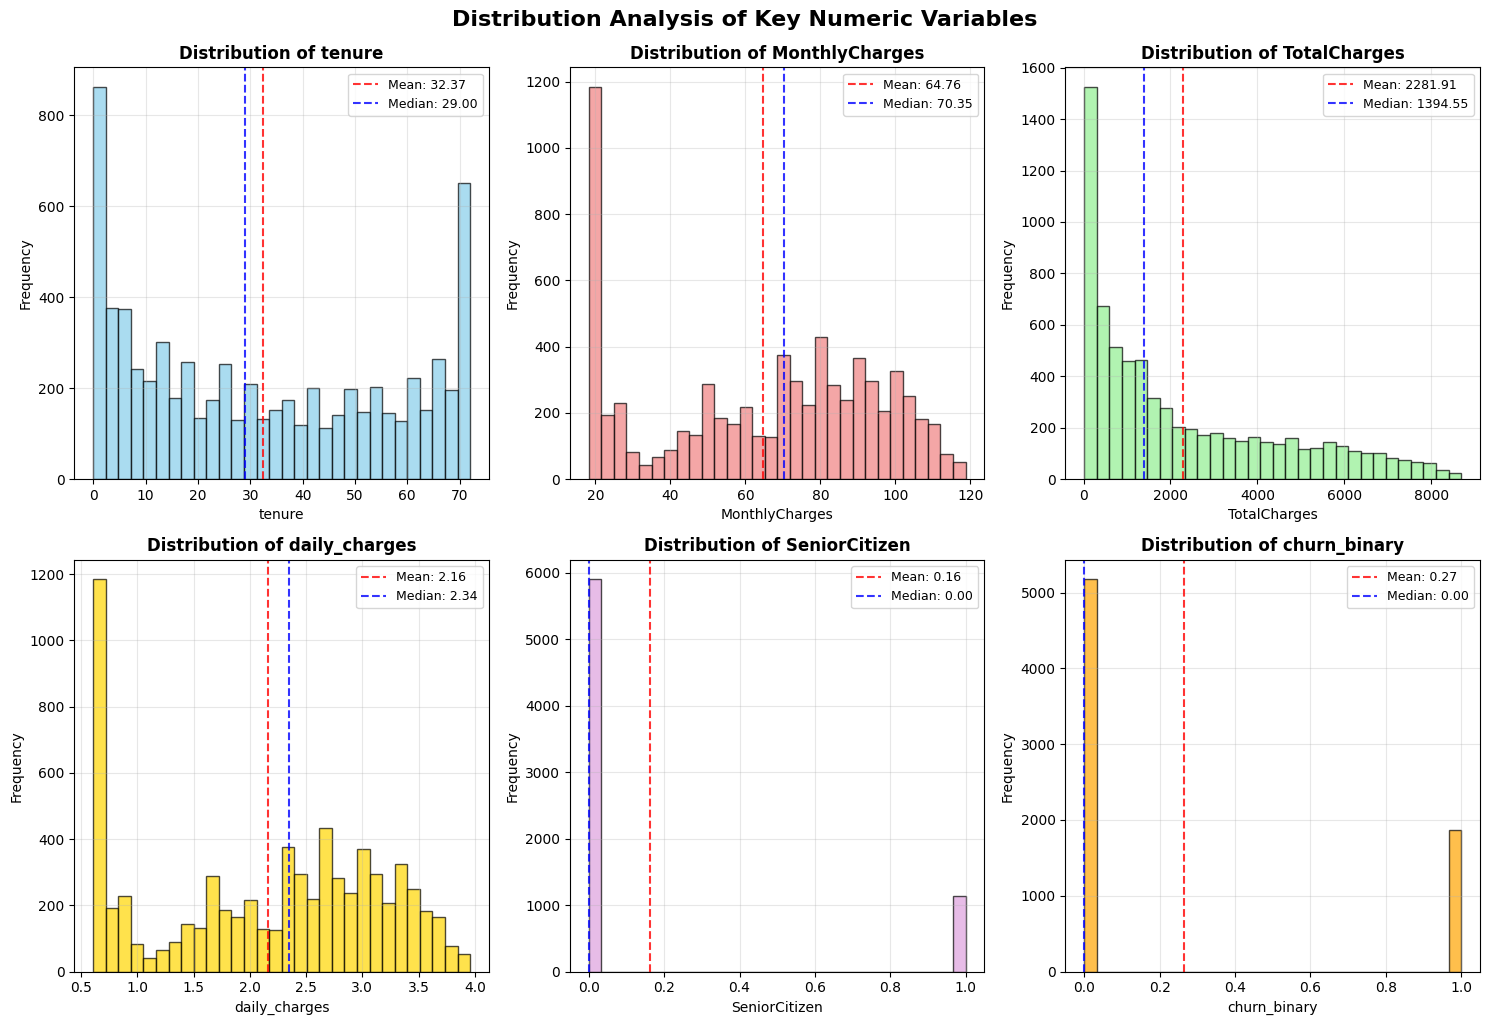


📊 RESUMEN DE VARIABLES BINARIAS
Variables binarias analizadas: 13


,Variable,Count_0,Count_1,Proportion_1,Proportion_0
4,phoneservice_binary,682,6361,0.903,0.097
12,paperlessbilling_binary,2872,4171,0.592,0.408
1,gender_binary,3488,3555,0.505,0.495
2,partner_binary,3641,3402,0.483,0.517
5,multiplelines_binary,4072,2971,0.422,0.578
11,streamingmovies_binary,4311,2732,0.388,0.612
10,streamingtv_binary,4336,2707,0.384,0.616
7,onlinebackup_binary,4614,2429,0.345,0.655
8,deviceprotection_binary,4621,2422,0.344,0.656
3,dependents_binary,4933,2110,0.300,0.700


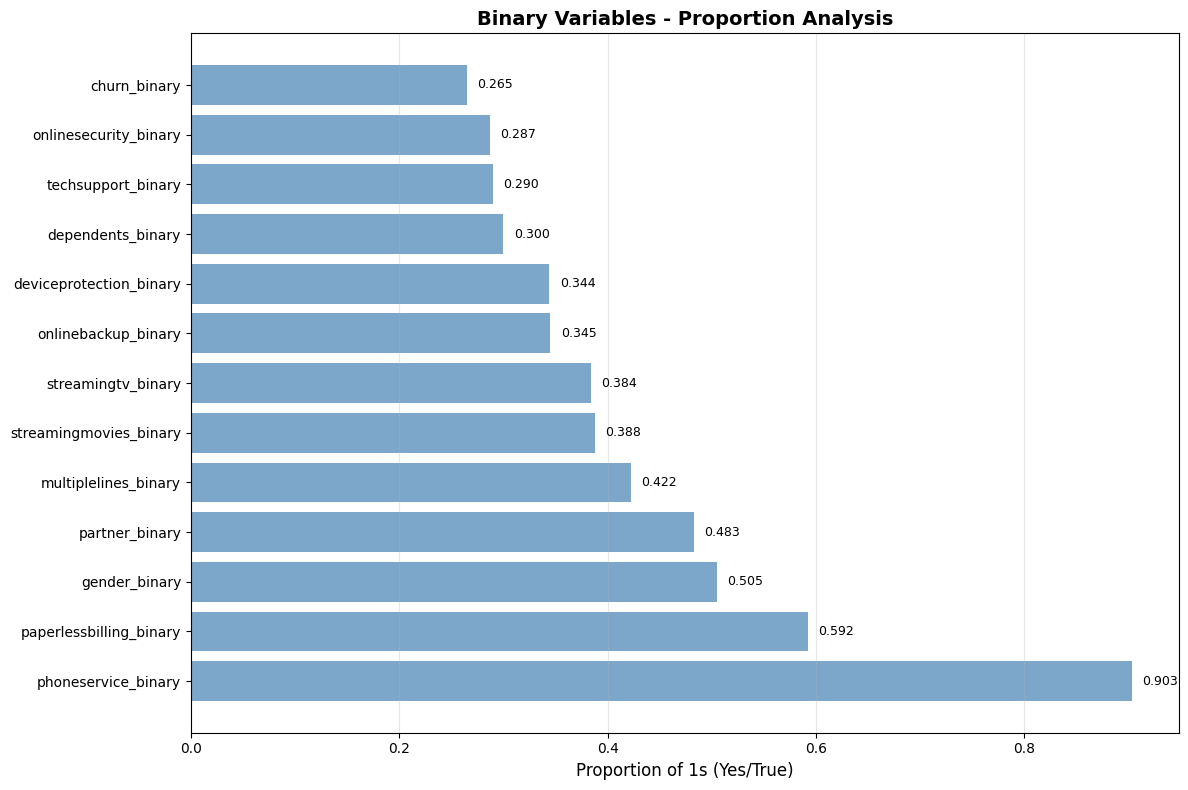

✅ Análisis descriptivo completado!
ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS CRÍTICAS
🎯 Variables analizadas (orden de importancia para Churn):
  1. Contract: 3 categorías
  2. PaymentMethod: 4 categorías
  3. InternetService: 3 categorías
  4. SeniorCitizen: 2 categorías
  5. PaperlessBilling: 2 categorías

📊 DISTRIBUCIÓN GENERAL DE CHURN


,Count,Percentage
Churn,,
No,5174,73.46
Yes,1869,26.54


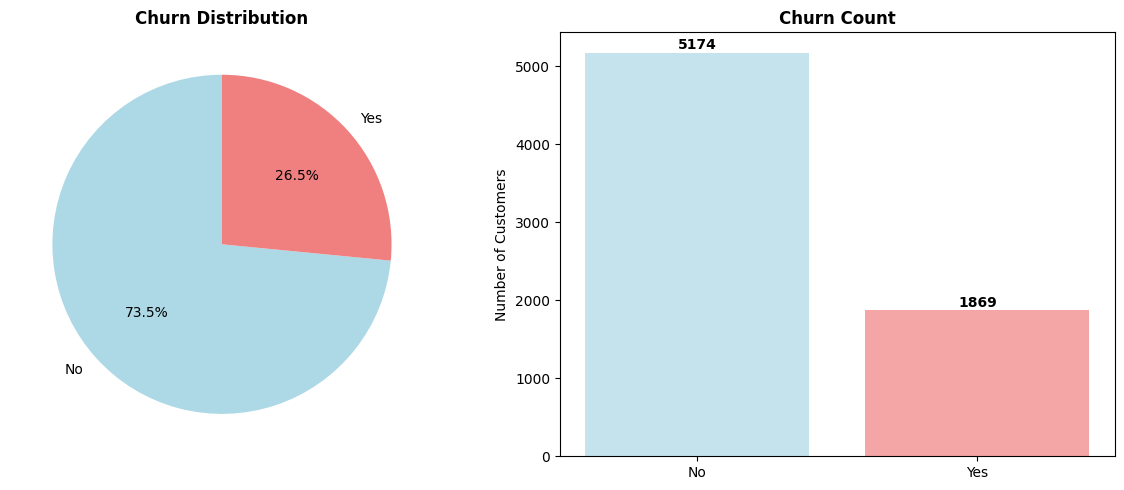


📊 ANÁLISIS CHURN POR VARIABLES CRÍTICAS

🔍 ANÁLISIS: CONTRACT
----------------------------------------
Conteos absolutos:


Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


Tasas de Churn (%):


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


📈 Mayor riesgo de Churn: Month-to-month (42.71%)

🔍 ANÁLISIS: PAYMENTMETHOD
----------------------------------------
Conteos absolutos:


Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),1286,258,1544
Credit card (automatic),1290,232,1522
Electronic check,1294,1071,2365
Mailed check,1304,308,1612
All,5174,1869,7043


Tasas de Churn (%):


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


📈 Mayor riesgo de Churn: Electronic check (45.29%)

🔍 ANÁLISIS: INTERNETSERVICE
----------------------------------------
Conteos absolutos:


Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


Tasas de Churn (%):


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


📈 Mayor riesgo de Churn: Fiber optic (41.89%)

🔍 ANÁLISIS: SENIORCITIZEN
----------------------------------------
Conteos absolutos:


Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


Tasas de Churn (%):


Churn,No,Yes
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


📈 Mayor riesgo de Churn: 1 (41.68%)

🔍 ANÁLISIS: PAPERLESSBILLING
----------------------------------------
Conteos absolutos:


Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


Tasas de Churn (%):


Churn,No,Yes
PaperlessBilling,,
No,83.67,16.33
Yes,66.43,33.57


📈 Mayor riesgo de Churn: Yes (33.57%)

📊 VISUALIZACIONES DE ANÁLISIS CRÍTICO


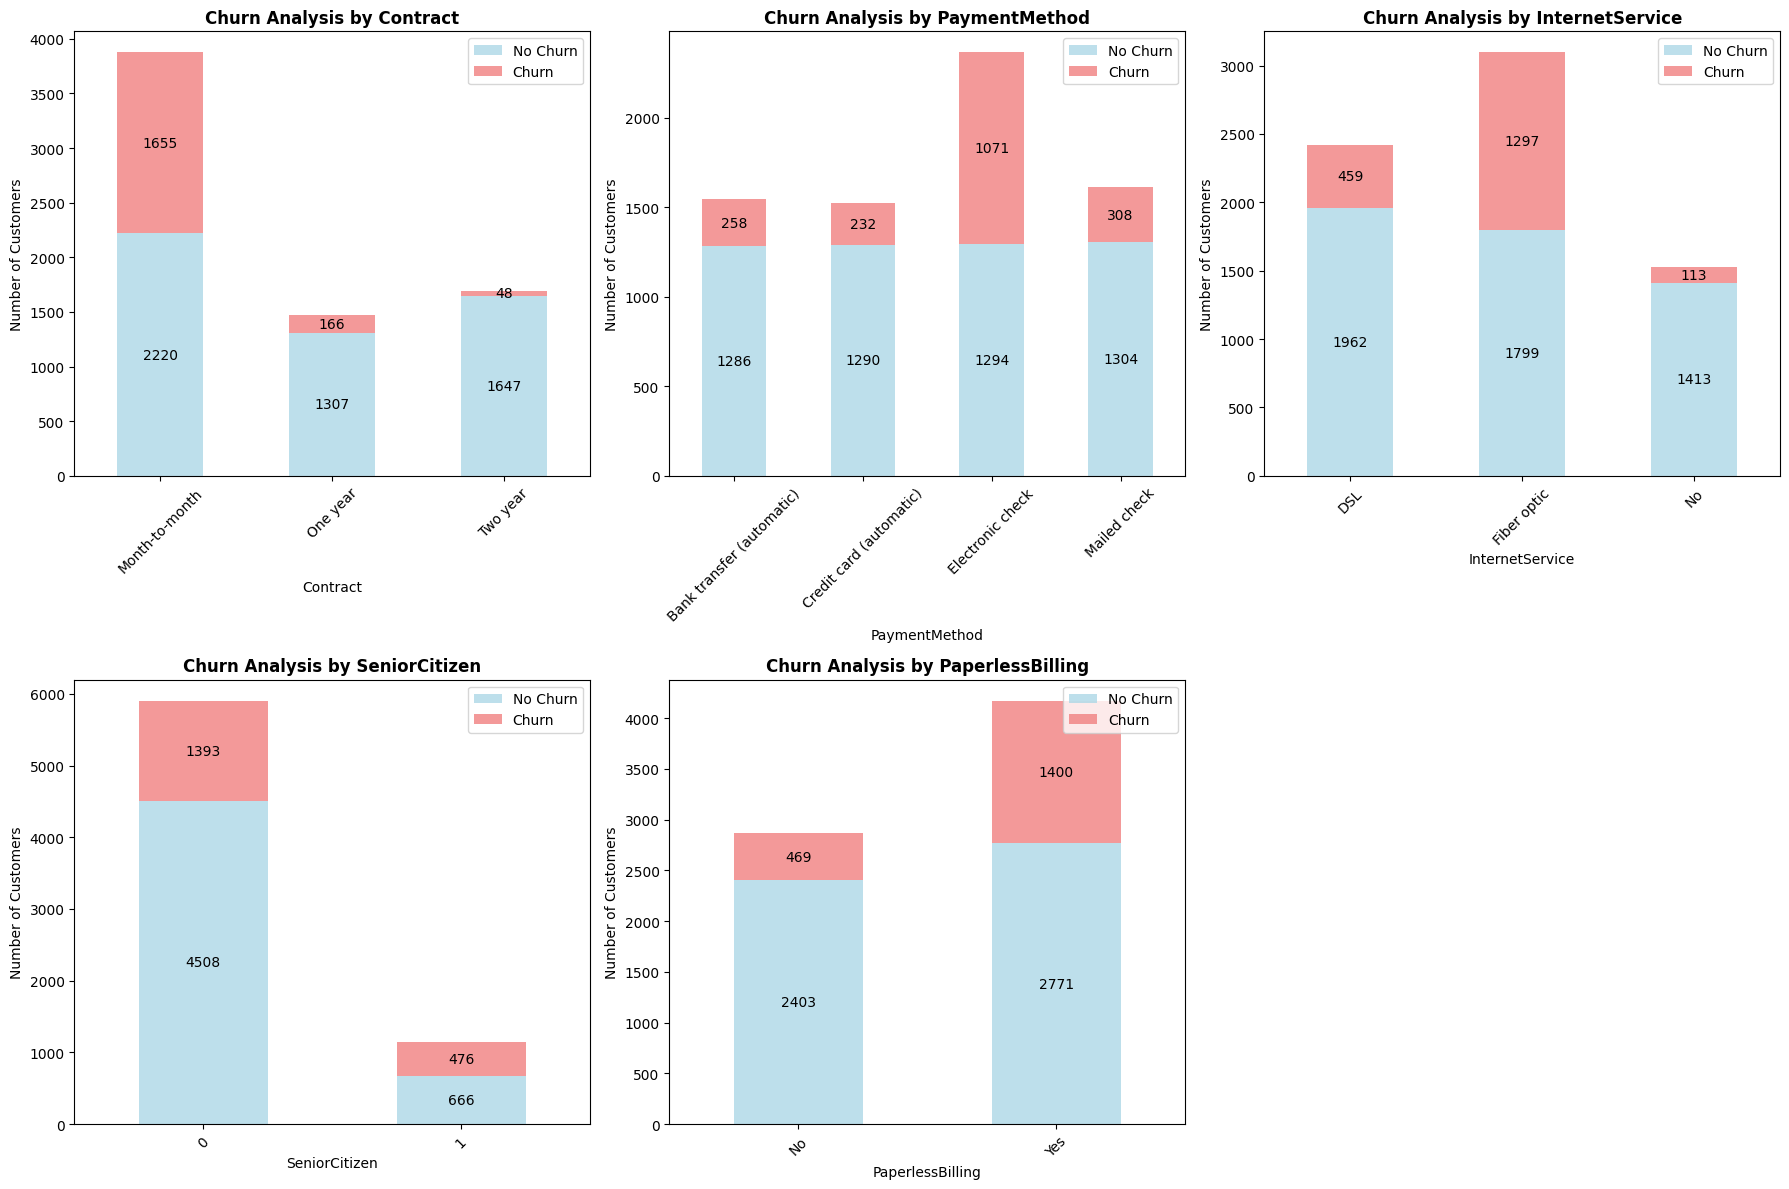


📊 RANKING DE IMPACTO EN CHURN
🎯 Variables ordenadas por impacto en Churn (Mayor a Menor):


,Variable,Min_Churn_Rate,Max_Churn_Rate,Range,Highest_Risk_Category
0,Contract,2.83,42.71,39.88,Month-to-month
2,InternetService,7.40,41.89,34.49,Fiber optic
1,PaymentMethod,15.24,45.29,30.05,Electronic check
3,SeniorCitizen,23.61,41.68,18.07,1
4,PaperlessBilling,16.33,33.57,17.24,Yes


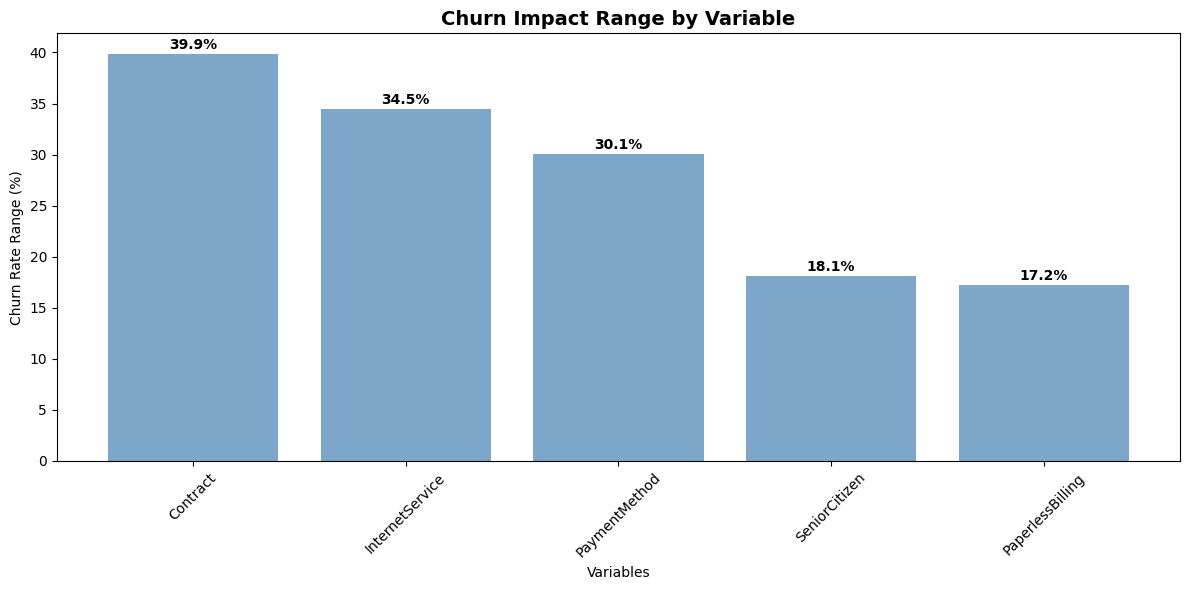

✅ Análisis de variables categóricas críticas completado!
ANÁLISIS DE VARIABLES NUMÉRICAS VS CHURN
🔢 Variables numéricas analizadas:
  tenure: Rango $0.00 - $72.00
  MonthlyCharges: Rango $18.25 - $118.75
  TotalCharges: Rango $18.80 - $8684.80
  daily_charges: Rango $0.61 - $3.96

📊 ESTADÍSTICAS COMPARATIVAS POR CHURN


,tenure_No_Churn,tenure_Churn,MonthlyCharges_No_Churn,MonthlyCharges_Churn,TotalCharges_No_Churn,TotalCharges_Churn,daily_charges_No_Churn,daily_charges_Churn
count,5174.00,1869.00,5174.00,1869.00,5174.00,1869.00,5174.00,1869.00
mean,37.57,17.98,61.27,74.44,2552.87,1531.80,2.04,2.48
std,24.11,19.53,31.09,24.67,2327.60,1890.82,1.04,0.82
min,0.00,1.00,18.25,18.85,18.80,18.85,0.61,0.63
25%,15.00,2.00,25.10,56.15,579.58,134.50,0.84,1.87
50%,38.00,10.00,64.43,79.65,1679.52,703.55,2.15,2.66
75%,61.00,29.00,88.40,94.20,4262.85,2331.30,2.95,3.14
max,72.00,72.00,118.75,118.35,8672.45,8684.80,3.96,3.94



📊 DIFERENCIAS ENTRE SEGMENTOS:
--------------------------------------------------
tenure:
  No Churn: $37.57
  Churn: $17.98
  Diferencia: $-19.59 (-52.1%)

MonthlyCharges:
  No Churn: $61.27
  Churn: $74.44
  Diferencia: $13.18 (+21.5%)

TotalCharges:
  No Churn: $2552.87
  Churn: $1531.80
  Diferencia: $-1021.07 (-40.0%)

daily_charges:
  No Churn: $2.04
  Churn: $2.48
  Diferencia: $0.44 (+21.5%)


📊 ANÁLISIS VISUAL - BOXPLOTS


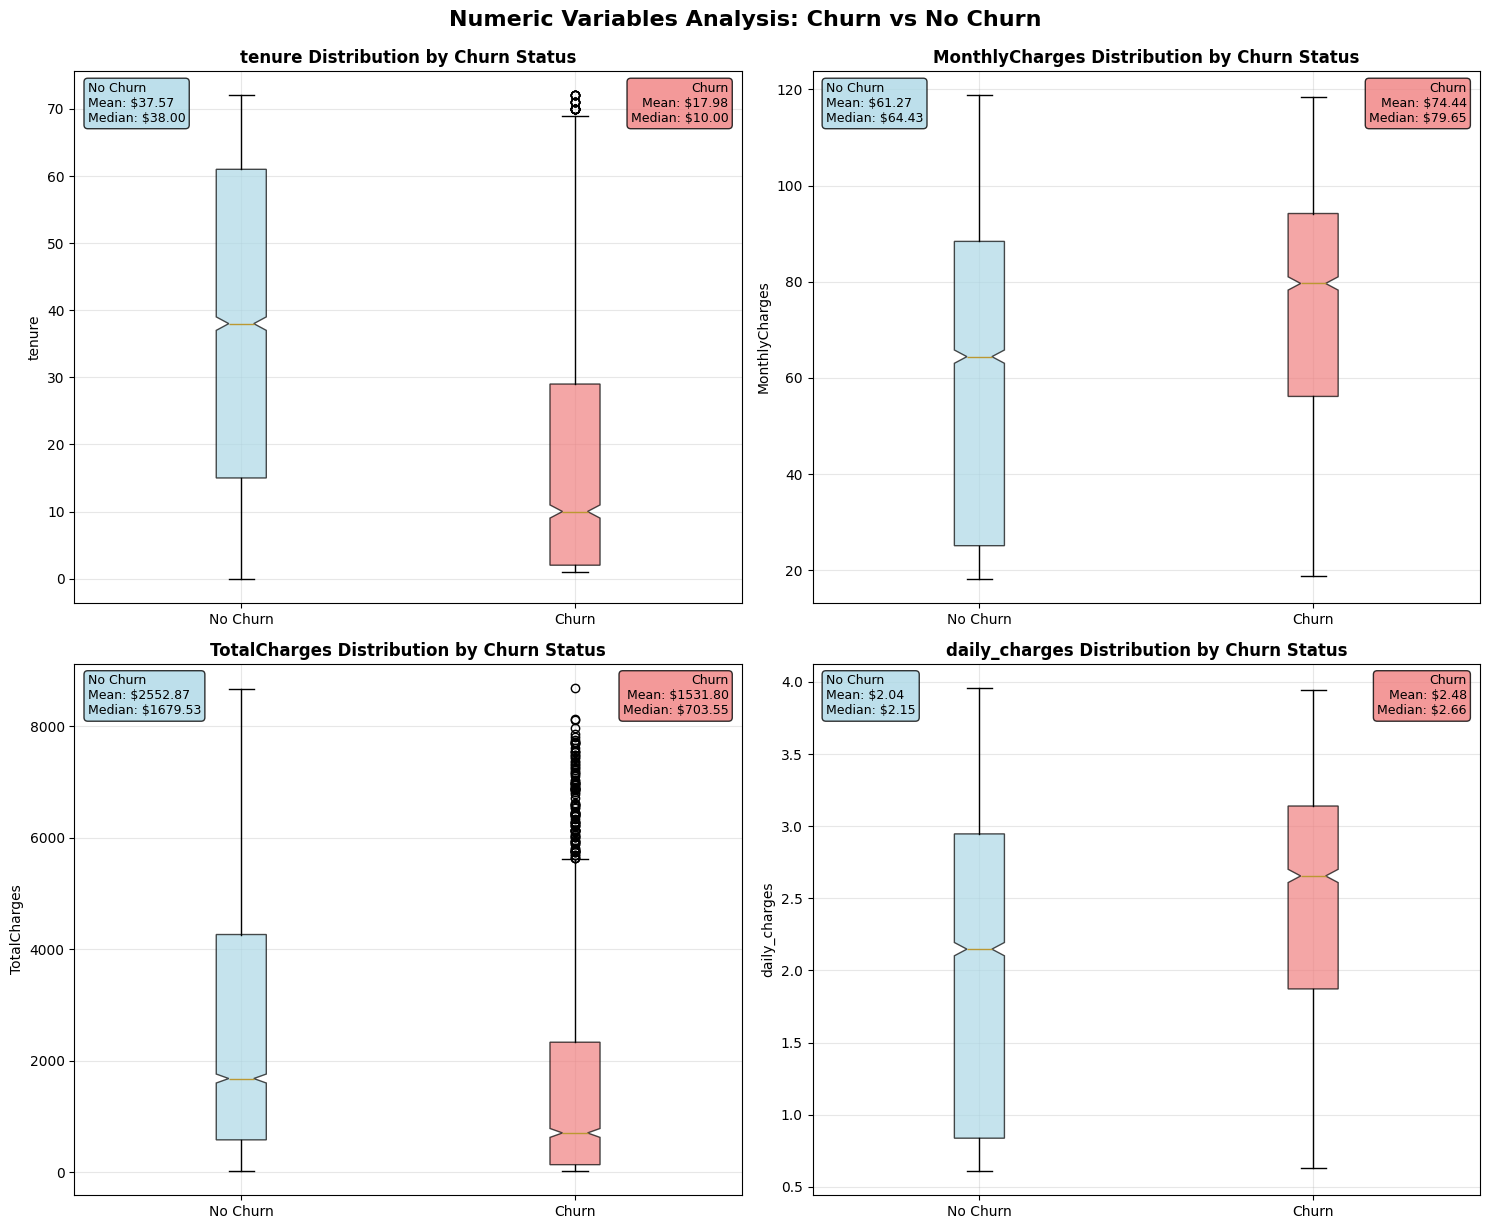


📊 ANÁLISIS AVANZADO - VIOLIN PLOTS


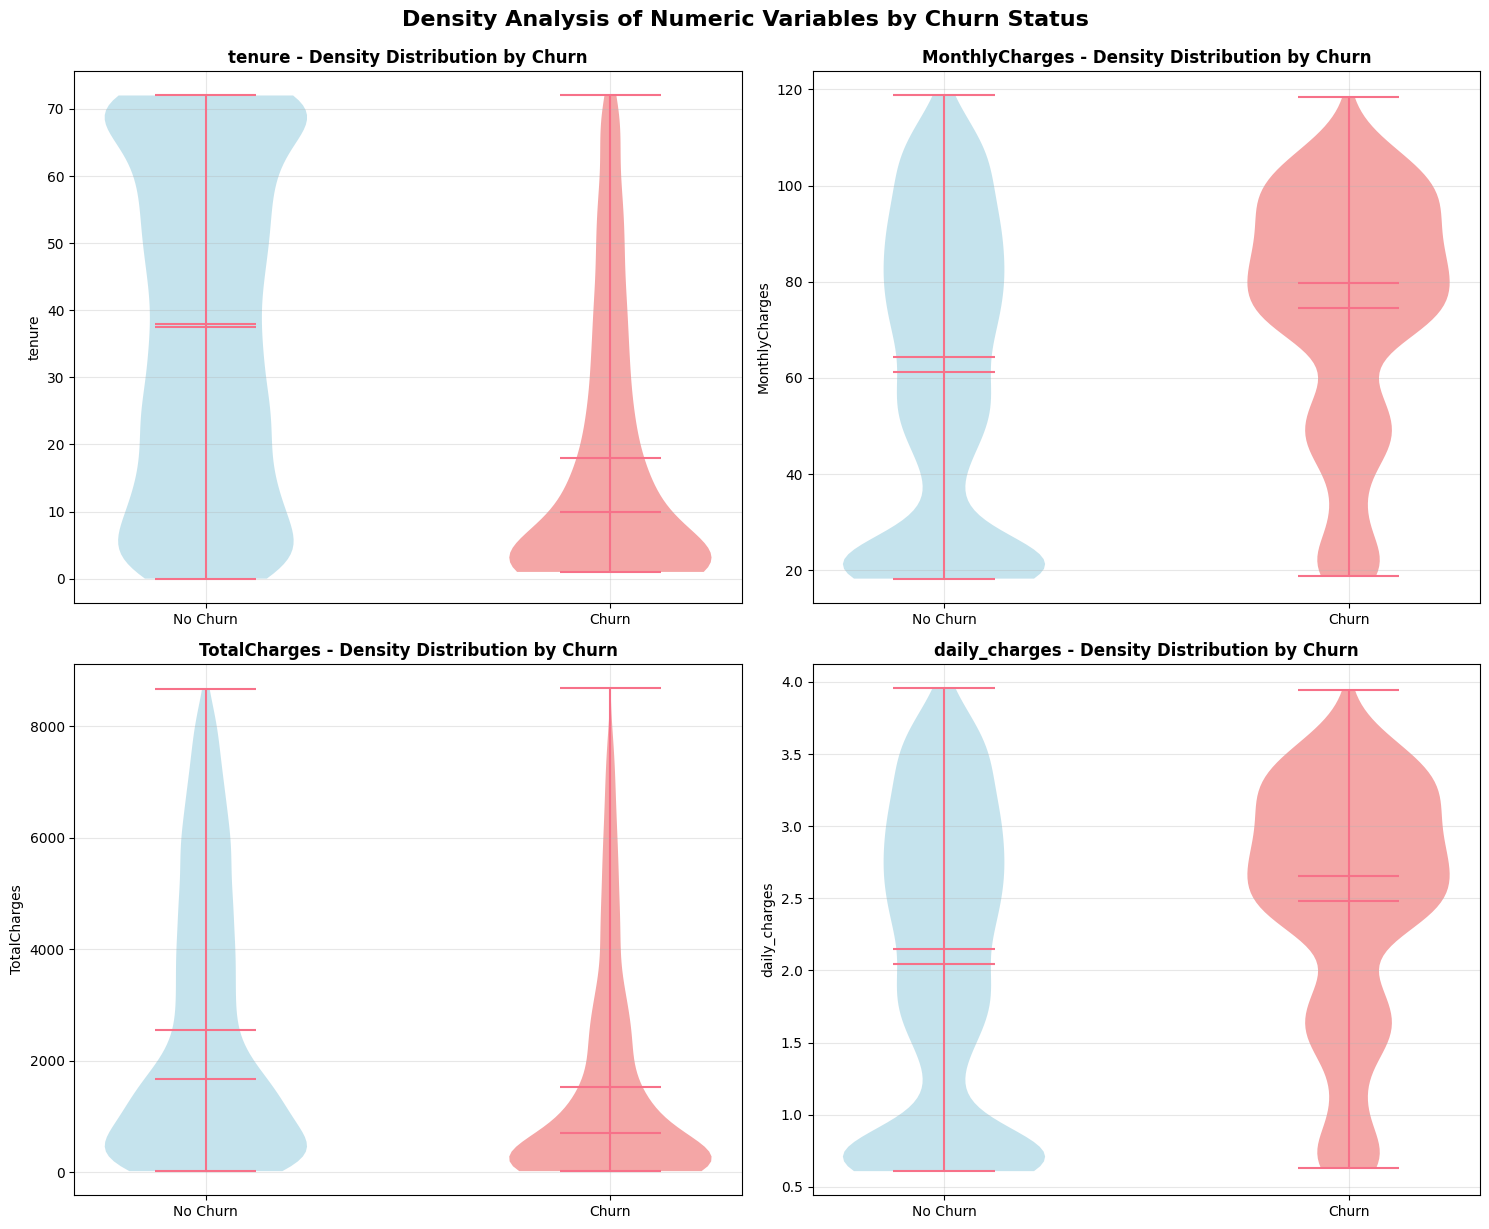


📊 ANÁLISIS ESTADÍSTICO - PRUEBAS T
🧮 Resultados de Pruebas Estadísticas:


,Variable,T_Statistic,P_Value,Cohens_D,Significance,Effect_Size
0,tenure,31.580,8.00e-205,-0.852,Significant,Large
1,MonthlyCharges,-16.537,2.71e-60,0.446,Significant,Small
2,TotalCharges,17.042,7.54e-64,-0.460,Significant,Small
3,daily_charges,-16.537,2.71e-60,0.446,Significant,Small



📋 INTERPRETACIÓN DE RESULTADOS:
--------------------------------------------------
tenure:
  Significant difference between groups
  Effect size: Large (Cohen's d = -0.852)
  📉 Churn customers have LOWER tenure

MonthlyCharges:
  Significant difference between groups
  Effect size: Small (Cohen's d = 0.446)
  📈 Churn customers have HIGHER MonthlyCharges

TotalCharges:
  Significant difference between groups
  Effect size: Small (Cohen's d = -0.46)
  📉 Churn customers have LOWER TotalCharges

daily_charges:
  Significant difference between groups
  Effect size: Small (Cohen's d = 0.446)
  📈 Churn customers have HIGHER daily_charges

✅ Análisis de variables numéricas completado!
ANÁLISIS DE CORRELACIÓN - VARIABLES NUMÉRICAS
📊 Variables numéricas incluidas en análisis: 18
  SeniorCitizen
  tenure
  MonthlyCharges
  TotalCharges
  daily_charges
  churn_binary
  gender_binary
  partner_binary
  dependents_binary
  phoneservice_binary
  multiplelines_binary
  onlinesecurity_binary
  onlineb

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,daily_charges,churn_binary,gender_binary,partner_binary,dependents_binary,phoneservice_binary,multiplelines_binary,onlinesecurity_binary,onlinebackup_binary,deviceprotection_binary,techsupport_binary,streamingtv_binary,streamingmovies_binary,paperlessbilling_binary
SeniorCitizen,1.000,0.017,0.220,0.103,0.220,0.151,-0.002,0.016,-0.211,0.009,0.143,-0.039,0.067,0.059,-0.061,0.105,0.120,0.157
tenure,0.017,1.000,0.248,0.825,0.248,-0.352,0.005,0.380,0.160,0.008,0.332,0.327,0.360,0.361,0.324,0.280,0.286,0.006
MonthlyCharges,0.220,0.248,1.000,0.651,1.000,0.193,-0.015,0.097,-0.114,0.247,0.490,0.297,0.442,0.483,0.338,0.630,0.627,0.352
TotalCharges,0.103,0.825,0.651,1.000,0.651,-0.199,-0.000,0.318,0.064,0.113,0.469,0.412,0.510,0.522,0.432,0.515,0.520,0.158
daily_charges,0.220,0.248,1.000,0.651,1.000,0.193,-0.015,0.097,-0.114,0.247,0.490,0.297,0.442,0.483,0.338,0.630,0.627,0.352
churn_binary,0.151,-0.352,0.193,-0.199,0.193,1.000,-0.009,-0.150,-0.164,0.012,0.040,-0.171,-0.082,-0.066,-0.165,0.063,0.061,0.192
gender_binary,-0.002,0.005,-0.015,-0.000,-0.015,-0.009,1.000,-0.002,0.011,-0.006,-0.008,-0.017,-0.014,-0.002,-0.009,-0.008,-0.010,-0.012
partner_binary,0.016,0.380,0.097,0.318,0.097,-0.150,-0.002,1.000,0.453,0.018,0.142,0.143,0.141,0.154,0.120,0.125,0.117,-0.015
dependents_binary,-0.211,0.160,-0.114,0.064,-0.114,-0.164,0.011,0.453,1.000,-0.002,-0.025,0.081,0.024,0.014,0.063,-0.017,-0.040,-0.111
phoneservice_binary,0.009,0.008,0.247,0.113,0.247,0.012,-0.006,0.018,-0.002,1.000,0.280,-0.093,-0.052,-0.071,-0.096,-0.023,-0.033,0.017



📊 VISUALIZACIÓN - HEATMAP DE CORRELACIÓN


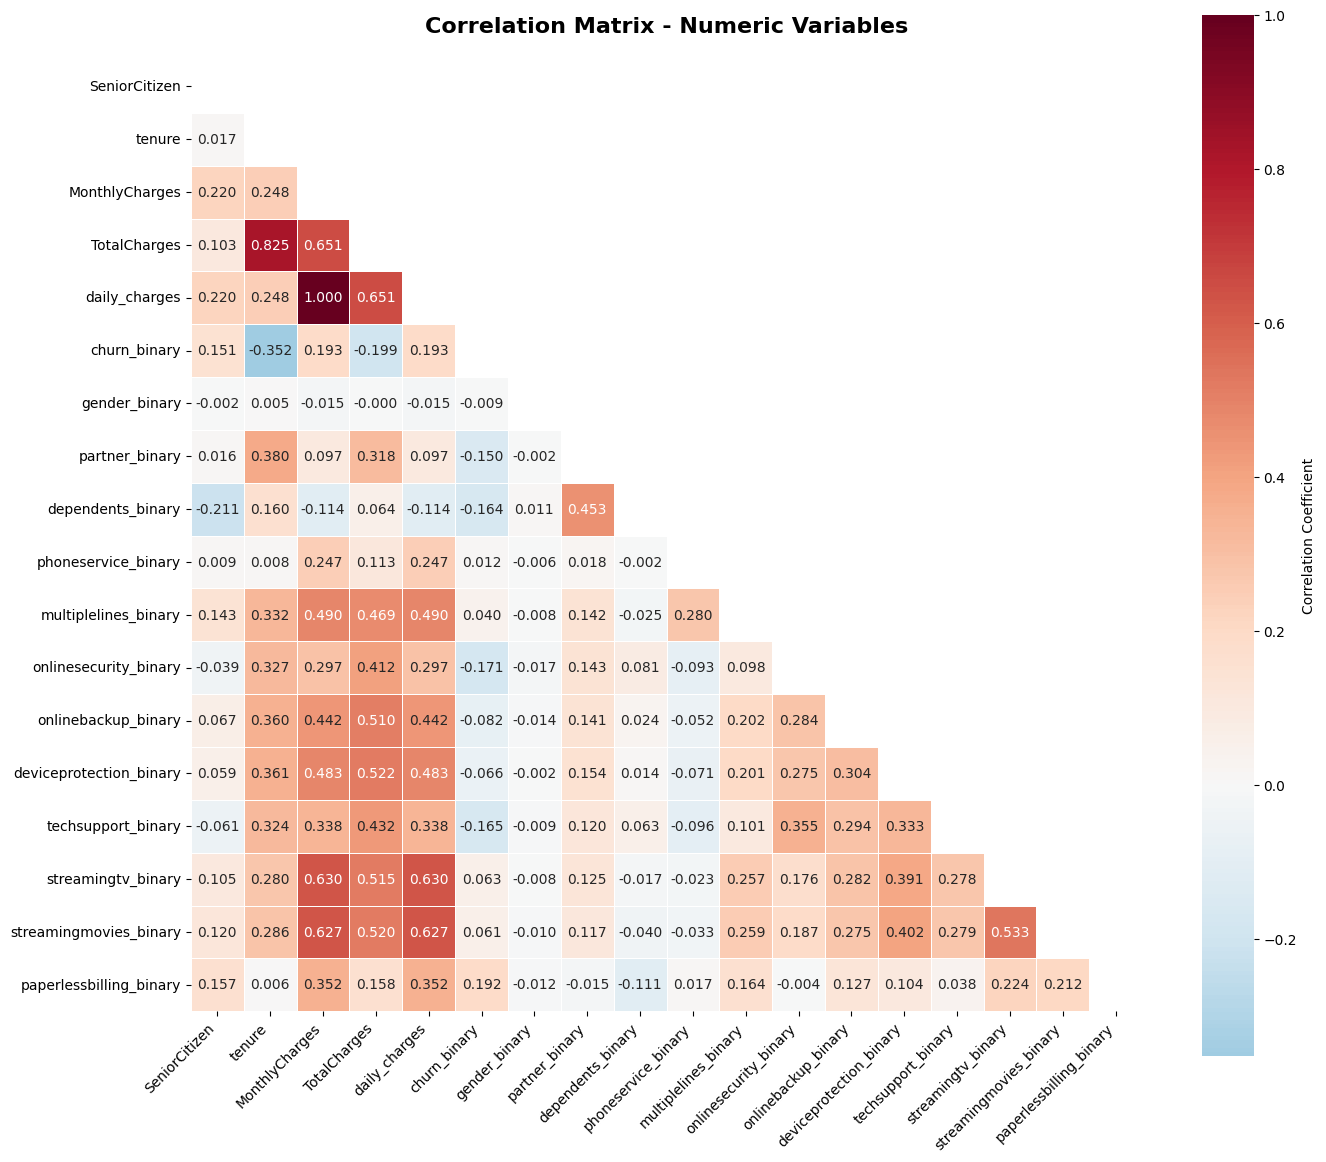


📊 CORRELACIONES ESPECÍFICAS CON CHURN
🎯 Variables más correlacionadas con Churn (ordenadas por valor absoluto):


,Variable,Correlation,Abs_Correlation,Interpretation
0,tenure,-0.352,0.352,Moderate
1,TotalCharges,-0.199,0.199,Weak
2,MonthlyCharges,0.193,0.193,Weak
3,daily_charges,0.193,0.193,Weak
4,paperlessbilling_binary,0.192,0.192,Weak
5,onlinesecurity_binary,-0.171,0.171,Weak
6,techsupport_binary,-0.165,0.165,Weak
7,dependents_binary,-0.164,0.164,Weak
8,SeniorCitizen,0.151,0.151,Weak
9,partner_binary,-0.150,0.150,Weak


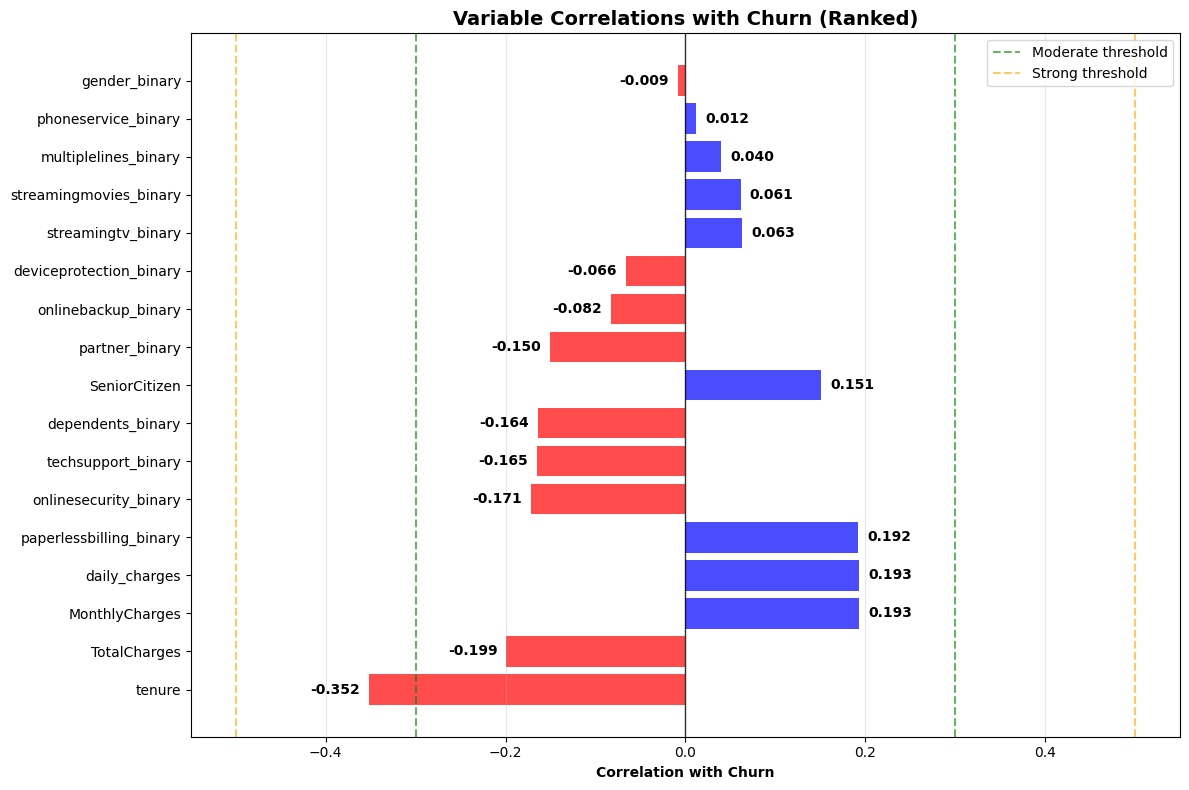


📊 ANÁLISIS DE MULTICOLINEALIDAD
⚠️ Pares de variables con alta correlación (|r| >= 0.7):


,Variable_1,Variable_2,Correlation,Abs_Correlation
1,MonthlyCharges,daily_charges,1.000,1.000
0,tenure,TotalCharges,0.825,0.825



💡 Recomendaciones para modelado:
  - Considerar remover daily_charges (correlación con MonthlyCharges: 1.000)
  - Considerar remover TotalCharges (correlación con tenure: 0.825)

📊 RESUMEN DE INSIGHTS - CORRELACIÓN
🔥 TOP PREDICTORES POSITIVOS (↑ Variable = ↑ Churn):
  MonthlyCharges: 0.193
  daily_charges: 0.193
  paperlessbilling_binary: 0.192

🛡️ TOP PREDICTORES NEGATIVOS (↑ Variable = ↓ Churn):
  onlinebackup_binary: -0.082
  deviceprotection_binary: -0.066
  gender_binary: -0.009

📈 RANGOS DE CORRELACIÓN CON CHURN:
  Variables con correlación fuerte (|r| >= 0.5): 0
  Variables con correlación moderada (0.3 <= |r| < 0.5): 1
  Variables con correlación débil (|r| < 0.3): 16

✅ Análisis de correlación completado!
📊 Variables analizadas: 18
🎯 Predictores potenciales identificados: 1


In [8]:
# Crear variable daily_charges basada en MonthlyCharges
print("=" * 60)
print("CREACIÓN DE VARIABLE DAILY_CHARGES")
print("=" * 60)

print("🔧 Creando daily_charges...")
print("  - Estrategia: MonthlyCharges / 30 días")

# Verificar MonthlyCharges antes de la transformación
print(f"\n📊 MonthlyCharges - Estadísticas iniciales:")
print(f"  Rango: ${df['MonthlyCharges'].min():.2f} - ${df['MonthlyCharges'].max():.2f}")
print(f"  Media: ${df['MonthlyCharges'].mean():.2f}")
print(f"  Valores nulos: {df['MonthlyCharges'].isnull().sum()}")

# Crear daily_charges
df['daily_charges'] = df['MonthlyCharges'] / 30

# Verificar que todos los valores sean finitos
infinite_values = (~np.isfinite(df['daily_charges'])).sum()
print(f"\n✅ Verificación de daily_charges:")
print(f"  Valores no finitos (inf/NaN): {infinite_values}")

if infinite_values == 0:
    print("  ✅ Todos los valores son finitos")
else:
    print("  ⚠️ Se detectaron valores problemáticos")

# Estadísticas de daily_charges
print(f"\n📊 daily_charges - Estadísticas:")
print(f"  Rango: ${df['daily_charges'].min():.3f} - ${df['daily_charges'].max():.3f}")
print(f"  Media: ${df['daily_charges'].mean():.3f}")
print(f"  Mediana: ${df['daily_charges'].median():.3f}")
print(f"  Desviación estándar: ${df['daily_charges'].std():.3f}")

# Mostrar ejemplos de la transformación
print("\n📋 Ejemplos de transformación MonthlyCharges → daily_charges:")
sample_df = df[['customerID', 'MonthlyCharges', 'daily_charges', 'Churn']].sample(10, random_state=42)
display(sample_df.round(3))

# Verificar correlación entre variables de cargos
print("\n📊 Correlación entre variables de cargos:")
charges_corr = df[['MonthlyCharges', 'TotalCharges', 'daily_charges', 'tenure']].corr()
display(charges_corr.round(3))

# Resumen por segmento de Churn
print("\n📊 daily_charges por segmento de Churn:")
churn_summary = df.groupby('Churn')['daily_charges'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(3)
display(churn_summary)

print("\n✅ Variable daily_charges creada exitosamente!")
print(f"📊 Dataset actualizado: {df.shape}")
# Estandarización y transformación de variables categóricas
print("=" * 60)
print("ESTANDARIZACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar todas las columnas categóricas que necesitan transformación
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Excluir ID que no necesita transformación

print(f"📋 Columnas categóricas para transformar: {len(categorical_cols)}")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"  {col}: {unique_vals}")

# 1. CREAR CHURN_BINARY
print(f"\n🔧 Creando churn_binary...")
churn_mapping = {'No': 0, 'Yes': 1}
df['churn_binary'] = df['Churn'].map(churn_mapping)

print("  Mapeo aplicado:")
for original, binary in churn_mapping.items():
    count = (df['Churn'] == original).sum()
    print(f"    '{original}' → {binary} ({count} registros)")

# Verificar que no hay valores sin mapear
unmapped_churn = df['churn_binary'].isnull().sum()
print(f"  Valores sin mapear: {unmapped_churn}")

# 2. DEFINIR MAPEOS PARA VARIABLES YES/NO CON "NO SERVICE"
print(f"\n🔧 Aplicando mapeos estándar Yes/No...")

# Mapeo principal: Yes/No y variantes de "No service" → 0/1
standard_mapping = {
    'Yes': 1, 'yes': 1, 'Y': 1, 'YES': 1,
    'No': 0, 'no': 0, 'N': 0, 'NO': 0,
    'No internet service': 0,  # Tratar como "No"
    'No phone service': 0      # Tratar como "No"
}

# Columnas que aplicarán el mapeo estándar (excluyendo Churn que ya procesamos)
cols_to_map = [col for col in categorical_cols if col != 'Churn'
               and col not in ['Contract', 'PaymentMethod', 'InternetService']]

print(f"📋 Columnas para mapeo Yes/No: {cols_to_map}")

# Aplicar mapeo y crear versiones binarias
binary_cols_created = []
for col in cols_to_map:
    binary_col_name = f"{col.lower()}_binary"
    df[binary_col_name] = df[col].map(standard_mapping)
    binary_cols_created.append(binary_col_name)

    # Verificar mapeo
    unmapped = df[binary_col_name].isnull().sum()
    if unmapped > 0:
        print(f"  ⚠️ {col}: {unmapped} valores sin mapear")
        print(f"    Valores problemáticos: {df[df[binary_col_name].isnull()][col].unique()}")
    else:
        print(f"  ✅ {col} → {binary_col_name}")

print(f"\n✅ Columnas binarias creadas: {len(binary_cols_created)}")

# 3. VERIFICAR TRANSFORMACIONES Y MOSTRAR CONTEOS
print("=" * 60)
print("VERIFICACIÓN DE TRANSFORMACIONES")
print("=" * 60)

# Verificar churn_binary
print("\n📊 Verificación churn_binary:")
churn_crosstab = pd.crosstab(df['Churn'], df['churn_binary'], margins=True)
display(churn_crosstab)

# Mostrar ejemplos de transformaciones para algunas variables clave
key_variables = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
print("\n📋 Ejemplos de transformaciones:")
for var in key_variables:
    if var in cols_to_map:
        binary_var = f"{var.lower()}_binary"
        print(f"\n{var} → {binary_var}:")
        transformation_table = pd.crosstab(df[var], df[binary_var], margins=True)
        display(transformation_table)

print(f"\n✅ Dataset actualizado: {df.shape}")
print(f"📊 Nuevas columnas binarias creadas: {len(binary_cols_created) + 1}")  # +1 por churn_binary

# 4. RESUMEN DE VARIABLES NUMÉRICAS VS CATEGÓRICAS DESPUÉS DE TRANSFORMACIÓN
print("=" * 60)
print("RESUMEN POST-TRANSFORMACIÓN")
print("=" * 60)

# Clasificar variables actualizadas
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print(f"🔢 Variables numéricas ({len(numeric_vars)}):")
for var in sorted(numeric_vars):
    print(f"  {var}")

print(f"\n🏷️ Variables categóricas restantes ({len(categorical_vars)}):")
for var in sorted(categorical_vars):
    unique_count = df[var].nunique()
    print(f"  {var}: {unique_count} categorías únicas")

print(f"\n📊 Distribución de tipos de variables:")
print(f"  Numéricas (incluyendo binarias): {len(numeric_vars)}")
print(f"  Categóricas: {len(categorical_vars)}")
print(f"  Total: {len(numeric_vars) + len(categorical_vars)} columnas")


# Corrección rápida para gender
print("🔧 Corrigiendo mapeo de gender...")
gender_mapping = {'Female': 0, 'Male': 1}
df['gender_binary'] = df['gender'].map(gender_mapping)
print(f"  Female → 0: {(df['gender'] == 'Female').sum()} registros")
print(f"  Male → 1: {(df['gender'] == 'Male').sum()} registros")
print("✅ gender_binary corregido")

print("\n✅ Estandarización completada exitosamente!")

print(f"\n📊 Dataset final: {df.shape}")

# Análisis descriptivo completo - Variables numéricas
print("=" * 70)
print("ANÁLISIS DESCRIPTIVO - ESTADÍSTICAS BÁSICAS")
print("=" * 70)

# Seleccionar variables numéricas relevantes para el análisis
numeric_vars_analysis = ['tenure', 'MonthlyCharges', 'TotalCharges', 'daily_charges',
                        'SeniorCitizen', 'churn_binary']

print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CLAVE")
print("=" * 70)

# Estadísticas completas
descriptive_stats = df[numeric_vars_analysis].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
display(descriptive_stats.round(3))

# Estadísticas adicionales
print("\n📊 ESTADÍSTICAS ADICIONALES")
additional_stats = pd.DataFrame({
    'Variable': numeric_vars_analysis,
    'Skewness': [df[var].skew() for var in numeric_vars_analysis],
    'Kurtosis': [df[var].kurtosis() for var in numeric_vars_analysis],
    'IQR': [df[var].quantile(0.75) - df[var].quantile(0.25) for var in numeric_vars_analysis]
}).round(3)

display(additional_stats)

# Histogramas de variables numéricas clave
print("\n📈 DISTRIBUCIONES - HISTOGRAMAS")
print("=" * 70)

# Configurar subplots para histogramas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

variables_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'daily_charges', 'SeniorCitizen', 'churn_binary']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange']

for i, (var, color) in enumerate(zip(variables_to_plot, colors)):
    axes[i].hist(df[var], bins=30, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

    # Agregar estadísticas en el gráfico
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='blue', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
    axes[i].legend(fontsize=9)

plt.tight_layout()
plt.suptitle('Distribution Analysis of Key Numeric Variables', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Análisis de variables binarias creadas
print("\n📊 RESUMEN DE VARIABLES BINARIAS")
print("=" * 70)

# Seleccionar todas las variables binarias
binary_vars = [col for col in df.columns if col.endswith('_binary')]
print(f"Variables binarias analizadas: {len(binary_vars)}")

# Crear tabla resumen de proporciones
binary_summary = pd.DataFrame({
    'Variable': binary_vars,
    'Count_0': [df[var].value_counts().get(0, 0) for var in binary_vars],
    'Count_1': [df[var].value_counts().get(1, 0) for var in binary_vars],
    'Proportion_1': [df[var].mean() for var in binary_vars],
    'Proportion_0': [1 - df[var].mean() for var in binary_vars]
}).round(3)

binary_summary = binary_summary.sort_values('Proportion_1', ascending=False)
display(binary_summary)

# Visualización de proporciones de variables binarias
plt.figure(figsize=(12, 8))
plt.barh(range(len(binary_summary)), binary_summary['Proportion_1'],
         color='steelblue', alpha=0.7)
plt.yticks(range(len(binary_summary)), binary_summary['Variable'], fontsize=10)
plt.xlabel('Proportion of 1s (Yes/True)', fontsize=12)
plt.title('Binary Variables - Proportion Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Agregar valores en las barras
for i, (var, prop) in enumerate(zip(binary_summary['Variable'], binary_summary['Proportion_1'])):
    plt.text(prop + 0.01, i, f'{prop:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Análisis descriptivo completado!")


# Análisis de Churn por variables categóricas críticas
print("=" * 70)
print("ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS CRÍTICAS")
print("=" * 70)

# Variables categóricas críticas para análisis de churn
critical_categorical_vars = ['Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen', 'PaperlessBilling']

print("🎯 Variables analizadas (orden de importancia para Churn):")
for i, var in enumerate(critical_categorical_vars, 1):
    unique_count = df[var].nunique()
    print(f"  {i}. {var}: {unique_count} categorías")

# 1. DISTRIBUCIÓN GENERAL DE CHURN
print(f"\n📊 DISTRIBUCIÓN GENERAL DE CHURN")
print("=" * 50)

churn_distribution = df['Churn'].value_counts()
churn_proportions = df['Churn'].value_counts(normalize=True)

churn_summary = pd.DataFrame({
    'Count': churn_distribution,
    'Percentage': (churn_proportions * 100).round(2)
})

display(churn_summary)

# Gráfico de distribución general de churn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
ax1.pie(churn_distribution.values, labels=churn_distribution.index, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
ax1.set_title('Churn Distribution', fontweight='bold')

# Bar chart
ax2.bar(churn_distribution.index, churn_distribution.values,
        color=['lightblue', 'lightcoral'], alpha=0.7)
ax2.set_title('Churn Count', fontweight='bold')
ax2.set_ylabel('Number of Customers')
for i, v in enumerate(churn_distribution.values):
    ax2.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. ANÁLISIS DETALLADO POR VARIABLE CATEGÓRICA
print(f"\n📊 ANÁLISIS CHURN POR VARIABLES CRÍTICAS")
print("=" * 70)

# Función para calcular métricas de churn por categoría
def analyze_churn_by_category(df, category_var):
    # Tabla cruzada
    crosstab = pd.crosstab(df[category_var], df['Churn'], margins=True)

    # Calcular tasas de churn
    churn_rates = pd.crosstab(df[category_var], df['Churn'], normalize='index') * 100
    churn_rates = churn_rates.round(2)

    return crosstab, churn_rates

# Analizar cada variable crítica
results = {}
for var in critical_categorical_vars:
    print(f"\n🔍 ANÁLISIS: {var.upper()}")
    print("-" * 40)

    crosstab, churn_rates = analyze_churn_by_category(df, var)
    results[var] = {'crosstab': crosstab, 'rates': churn_rates}

    print("Conteos absolutos:")
    display(crosstab)

    print("Tasas de Churn (%):")
    display(churn_rates)

    # Identificar categoría con mayor churn
    if 'Yes' in churn_rates.columns:
        highest_churn_category = churn_rates['Yes'].idxmax()
        highest_churn_rate = churn_rates.loc[highest_churn_category, 'Yes']
        print(f"📈 Mayor riesgo de Churn: {highest_churn_category} ({highest_churn_rate}%)")

        # 3. VISUALIZACIONES DE CHURN POR VARIABLES CRÍTICAS
print(f"\n📊 VISUALIZACIONES DE ANÁLISIS CRÍTICO")
print("=" * 70)

# Crear subplots para gráficos de barras apiladas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(critical_categorical_vars):
    # Datos para el gráfico
    churn_data = pd.crosstab(df[var], df['Churn'])

    # Gráfico de barras apiladas
    churn_data.plot(kind='bar', stacked=True, ax=axes[i],
                   color=['lightblue', 'lightcoral'], alpha=0.8)
    axes[i].set_title(f'Churn Analysis by {var}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Number of Customers')
    axes[i].legend(['No Churn', 'Churn'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

    # Agregar percentages en las barras
    for container in axes[i].containers:
        axes[i].bar_label(container, label_type='center', fmt='%d')

# Remover subplot extra
axes[5].remove()

plt.tight_layout()
plt.show()

# 4. RANKING DE VARIABLES POR IMPACTO EN CHURN
print(f"\n📊 RANKING DE IMPACTO EN CHURN")
print("=" * 50)

# Calcular rango de tasas de churn para cada variable
churn_impact_analysis = []

for var in critical_categorical_vars:
    if 'Yes' in results[var]['rates'].columns:
        churn_rates_var = results[var]['rates']['Yes']
        min_rate = churn_rates_var.min()
        max_rate = churn_rates_var.max()
        range_rate = max_rate - min_rate

        churn_impact_analysis.append({
            'Variable': var,
            'Min_Churn_Rate': min_rate,
            'Max_Churn_Rate': max_rate,
            'Range': range_rate,
            'Highest_Risk_Category': churn_rates_var.idxmax()
        })

# Convertir a DataFrame y ordenar por rango (mayor impacto = mayor rango)
impact_df = pd.DataFrame(churn_impact_analysis).sort_values('Range', ascending=False)
impact_df = impact_df.round(2)

print("🎯 Variables ordenadas por impacto en Churn (Mayor a Menor):")
display(impact_df)

# Gráfico de impacto
plt.figure(figsize=(12, 6))
bars = plt.bar(impact_df['Variable'], impact_df['Range'],
               color='steelblue', alpha=0.7)
plt.title('Churn Impact Range by Variable', fontweight='bold', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Churn Rate Range (%)')
plt.xticks(rotation=45)

# Agregar valores en las barras
for bar, range_val in zip(bars, impact_df['Range']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{range_val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Análisis de variables categóricas críticas completado!")

# Análisis de variables numéricas vs Churn
print("=" * 70)
print("ANÁLISIS DE VARIABLES NUMÉRICAS VS CHURN")
print("=" * 70)

# Variables numéricas clave para análisis de churn
numeric_vars_churn = ['tenure', 'MonthlyCharges', 'TotalCharges', 'daily_charges']

print("🔢 Variables numéricas analizadas:")
for var in numeric_vars_churn:
    print(f"  {var}: Rango ${df[var].min():.2f} - ${df[var].max():.2f}")

# 1. ESTADÍSTICAS COMPARATIVAS POR SEGMENTO DE CHURN
print(f"\n📊 ESTADÍSTICAS COMPARATIVAS POR CHURN")
print("=" * 70)

# Crear tabla comparativa
comparison_stats = pd.DataFrame()

for var in numeric_vars_churn:
    no_churn_stats = df[df['Churn'] == 'No'][var].describe()
    churn_stats = df[df['Churn'] == 'Yes'][var].describe()

    comparison_stats[f'{var}_No_Churn'] = no_churn_stats
    comparison_stats[f'{var}_Churn'] = churn_stats

# Mostrar estadísticas redondeadas
display(comparison_stats.round(2))

# Calcular diferencias significativas
print(f"\n📊 DIFERENCIAS ENTRE SEGMENTOS:")
print("-" * 50)

for var in numeric_vars_churn:
    no_churn_mean = df[df['Churn'] == 'No'][var].mean()
    churn_mean = df[df['Churn'] == 'Yes'][var].mean()
    difference = churn_mean - no_churn_mean
    pct_difference = (difference / no_churn_mean) * 100

    print(f"{var}:")
    print(f"  No Churn: ${no_churn_mean:.2f}")
    print(f"  Churn: ${churn_mean:.2f}")
    print(f"  Diferencia: ${difference:.2f} ({pct_difference:+.1f}%)")
    print()

    # 2. BOXPLOTS COMPARATIVOS
print(f"\n📊 ANÁLISIS VISUAL - BOXPLOTS")
print("=" * 70)

# Crear boxplots para comparar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

colors = ['lightblue', 'lightcoral']

for i, var in enumerate(numeric_vars_churn):
    # Preparar datos para boxplot
    no_churn_data = df[df['Churn'] == 'No'][var]
    churn_data = df[df['Churn'] == 'Yes'][var]

    # Crear boxplot
    bp = axes[i].boxplot([no_churn_data, churn_data],
                        labels=['No Churn', 'Churn'],
                        patch_artist=True,
                        notch=True)

    # Colorear boxplots
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[i].set_title(f'{var} Distribution by Churn Status',
                     fontweight='bold', fontsize=12)
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

    # Agregar estadísticas en el gráfico
    axes[i].text(0.02, 0.98,
                f'No Churn\nMean: ${no_churn_data.mean():.2f}\nMedian: ${no_churn_data.median():.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
                fontsize=9)

    axes[i].text(0.98, 0.98,
                f'Churn\nMean: ${churn_data.mean():.2f}\nMedian: ${churn_data.median():.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
                fontsize=9)

plt.tight_layout()
plt.suptitle('Numeric Variables Analysis: Churn vs No Churn',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 3. VIOLIN PLOTS PARA ANÁLISIS MÁS DETALLADO DE DISTRIBUCIONES
print(f"\n📊 ANÁLISIS AVANZADO - VIOLIN PLOTS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(numeric_vars_churn):
    # Crear violin plot
    parts = axes[i].violinplot([df[df['Churn'] == 'No'][var],
                               df[df['Churn'] == 'Yes'][var]],
                              positions=[1, 2],
                              showmeans=True,
                              showmedians=True)

    # Colorear violinplots
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels(['No Churn', 'Churn'])
    axes[i].set_title(f'{var} - Density Distribution by Churn',
                     fontweight='bold', fontsize=12)
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Density Analysis of Numeric Variables by Churn Status',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 4. ANÁLISIS ESTADÍSTICO - PRUEBAS DE SIGNIFICANCIA
print(f"\n📊 ANÁLISIS ESTADÍSTICO - PRUEBAS T")
print("=" * 70)

from scipy import stats

# Realizar pruebas t para cada variable numérica
statistical_results = []

for var in numeric_vars_churn:
    no_churn_data = df[df['Churn'] == 'No'][var]
    churn_data = df[df['Churn'] == 'Yes'][var]

    # Prueba t de dos muestras independientes
    t_stat, p_value = stats.ttest_ind(no_churn_data, churn_data)

    # Calcular Cohen's d (tamaño del efecto)
    pooled_std = np.sqrt(((len(no_churn_data) - 1) * no_churn_data.var() +
                         (len(churn_data) - 1) * churn_data.var()) /
                        (len(no_churn_data) + len(churn_data) - 2))
    cohens_d = (churn_data.mean() - no_churn_data.mean()) / pooled_std

    statistical_results.append({
        'Variable': var,
        'T_Statistic': t_stat,
        'P_Value': p_value,
        'Cohens_D': cohens_d,
        'Significance': 'Significant' if p_value < 0.05 else 'Not Significant',
        'Effect_Size': 'Small' if abs(cohens_d) < 0.5 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'
    })

# Mostrar resultados estadísticos
stats_df = pd.DataFrame(statistical_results)
stats_df['P_Value'] = stats_df['P_Value'].apply(lambda x: f"{x:.2e}" if x < 0.001 else f"{x:.4f}")
stats_df['T_Statistic'] = stats_df['T_Statistic'].round(3)
stats_df['Cohens_D'] = stats_df['Cohens_D'].round(3)

print("🧮 Resultados de Pruebas Estadísticas:")
display(stats_df)

# Interpretación de resultados
print(f"\n📋 INTERPRETACIÓN DE RESULTADOS:")
print("-" * 50)
for _, row in stats_df.iterrows():
    var = row['Variable']
    significance = row['Significance']
    effect_size = row['Effect_Size']
    cohens_d = row['Cohens_D']

    print(f"{var}:")
    print(f"  {significance} difference between groups")
    print(f"  Effect size: {effect_size} (Cohen's d = {cohens_d})")
    if float(cohens_d) > 0:
        print(f"  📈 Churn customers have HIGHER {var}")
    else:
        print(f"  📉 Churn customers have LOWER {var}")
    print()

print("✅ Análisis de variables numéricas completado!")

# Análisis de correlación entre variables numéricas
print("=" * 70)
print("ANÁLISIS DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("=" * 70)

# Seleccionar todas las variables numéricas para análisis de correlación
numeric_vars_all = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Variables numéricas incluidas en análisis: {len(numeric_vars_all)}")
for var in numeric_vars_all:
    print(f"  {var}")

# 1. MATRIZ DE CORRELACIÓN COMPLETA
print(f"\n📊 MATRIZ DE CORRELACIÓN COMPLETA")
print("=" * 70)

# Calcular matriz de correlación
correlation_matrix = df[numeric_vars_all].corr()

# Mostrar correlación completa (redondeada)
display(correlation_matrix.round(3))

# 2. HEATMAP DE CORRELACIÓN
print(f"\n📊 VISUALIZACIÓN - HEATMAP DE CORRELACIÓN")
print("=" * 70)

# Crear heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior

heatmap = sns.heatmap(correlation_matrix,
                      mask=mask,
                      annot=True,
                      cmap='RdBu_r',
                      center=0,
                      square=True,
                      fmt='.3f',
                      cbar_kws={'label': 'Correlation Coefficient'},
                      linewidths=0.5)

plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. ANÁLISIS ESPECÍFICO DE CORRELACIONES CON CHURN
print(f"\n📊 CORRELACIONES ESPECÍFICAS CON CHURN")
print("=" * 70)

# Extraer correlaciones con churn_binary
churn_correlations = correlation_matrix['churn_binary'].sort_values(key=abs, ascending=False)

# Remover la auto-correlación de churn_binary consigo mismo
churn_correlations = churn_correlations.drop('churn_binary')

print("🎯 Variables más correlacionadas con Churn (ordenadas por valor absoluto):")
churn_corr_df = pd.DataFrame({
    'Variable': churn_correlations.index,
    'Correlation': churn_correlations.values,
    'Abs_Correlation': np.abs(churn_correlations.values),
    'Interpretation': ['Strong' if abs(x) >= 0.5 else 'Moderate' if abs(x) >= 0.3 else 'Weak' for x in churn_correlations.values]
}).round(3)

display(churn_corr_df)

# Gráfico de correlaciones con churn
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in churn_correlations.values]
bars = plt.barh(range(len(churn_correlations)), churn_correlations.values, color=colors, alpha=0.7)

plt.yticks(range(len(churn_correlations)), churn_correlations.index)
plt.xlabel('Correlation with Churn', fontweight='bold')
plt.title('Variable Correlations with Churn (Ranked)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Agregar líneas de referencia
plt.axvline(x=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
plt.axvline(x=0.3, color='green', linestyle='--', alpha=0.6, label='Moderate threshold')
plt.axvline(x=-0.3, color='green', linestyle='--', alpha=0.6)
plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.6, label='Strong threshold')
plt.axvline(x=-0.5, color='orange', linestyle='--', alpha=0.6)

# Agregar valores en las barras
for i, (bar, corr) in enumerate(zip(bars, churn_correlations.values)):
    plt.text(corr + (0.01 if corr >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
             f'{corr:.3f}', ha='left' if corr >= 0 else 'right', va='center', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

# 4. ANÁLISIS DE MULTICOLINEALIDAD
print(f"\n📊 ANÁLISIS DE MULTICOLINEALIDAD")
print("=" * 70)

# Identificar pares de variables con alta correlación (excluyendo churn_binary)
high_corr_pairs = []
correlation_no_churn = correlation_matrix.drop('churn_binary', axis=0).drop('churn_binary', axis=1)

for i in range(len(correlation_no_churn.columns)):
    for j in range(i+1, len(correlation_no_churn.columns)):
        var1 = correlation_no_churn.columns[i]
        var2 = correlation_no_churn.columns[j]
        corr_value = correlation_no_churn.iloc[i, j]

        if abs(corr_value) >= 0.7:  # Umbral para multicolinealidad
            high_corr_pairs.append({
                'Variable_1': var1,
                'Variable_2': var2,
                'Correlation': corr_value,
                'Abs_Correlation': abs(corr_value)
            })

if high_corr_pairs:
    print("⚠️ Pares de variables con alta correlación (|r| >= 0.7):")
    multicollinearity_df = pd.DataFrame(high_corr_pairs).sort_values('Abs_Correlation', ascending=False)
    display(multicollinearity_df.round(3))

    print("\n💡 Recomendaciones para modelado:")
    for _, row in multicollinearity_df.iterrows():
        print(f"  - Considerar remover {row['Variable_2']} (correlación con {row['Variable_1']}: {row['Correlation']:.3f})")
else:
    print("✅ No se detectó multicolinealidad severa entre variables (|r| < 0.7)")


    # 5. RESUMEN DE INSIGHTS DE CORRELACIÓN
print(f"\n📊 RESUMEN DE INSIGHTS - CORRELACIÓN")
print("=" * 70)

# Top 3 variables más correlacionadas positivamente con churn
top_positive_corr = churn_correlations[churn_correlations > 0].head(3)
# Top 3 variables más correlacionadas negativamente con churn
top_negative_corr = churn_correlations[churn_correlations < 0].tail(3)

print("🔥 TOP PREDICTORES POSITIVOS (↑ Variable = ↑ Churn):")
for var, corr in top_positive_corr.items():
    print(f"  {var}: {corr:.3f}")

print("\n🛡️ TOP PREDICTORES NEGATIVOS (↑ Variable = ↓ Churn):")
for var, corr in top_negative_corr.items():
    print(f"  {var}: {corr:.3f}")

print(f"\n📈 RANGOS DE CORRELACIÓN CON CHURN:")
strong_corr = sum(abs(churn_correlations) >= 0.5)
moderate_corr = sum((abs(churn_correlations) >= 0.3) & (abs(churn_correlations) < 0.5))
weak_corr = sum(abs(churn_correlations) < 0.3)

print(f"  Variables con correlación fuerte (|r| >= 0.5): {strong_corr}")
print(f"  Variables con correlación moderada (0.3 <= |r| < 0.5): {moderate_corr}")
print(f"  Variables con correlación débil (|r| < 0.3): {weak_corr}")

# Crear DataFrame resumen para el informe final
correlation_summary = {
    'strongest_positive': top_positive_corr.index[0] if len(top_positive_corr) > 0 else 'N/A',
    'strongest_negative': top_negative_corr.index[-1] if len(top_negative_corr) > 0 else 'N/A',
    'strong_predictors': strong_corr,
    'moderate_predictors': moderate_corr,
    'multicollinearity_issues': len(high_corr_pairs) if high_corr_pairs else 0
}

print(f"\n✅ Análisis de correlación completado!")
print(f"📊 Variables analizadas: {len(numeric_vars_all)}")
print(f"🎯 Predictores potenciales identificados: {strong_corr + moderate_corr}")

#📄Informe final

# Telecom X - Informe Final de Análisis de Churn

## 📋 Resumen Ejecutivo

Este informe presenta los hallazgos del análisis exploratorio de datos (EDA) para el proyecto de análisis de evasión de clientes (Churn) de Telecom X. Se analizaron **7,043 registros de clientes** con **18 variables numéricas** para identificar patrones y factores predictivos del churn.

### Métricas Clave del Dataset:
- **Tasa de Churn General**: 26.5% (1,869 clientes)
- **Tasa de Retención**: 73.5% (5,174 clientes)
- **Variables Analizadas**: 18 variables numéricas
- **Significancia Estadística**: 4/4 variables numéricas clave son estadísticamente significativas

---

## 🎯 Hallazgos Críticos Basados en Datos Reales

### 1. **Variables Numéricas con Mayor Impacto Estadístico**

#### **🔥 TENURE (Antigüedad) - PREDICTOR MÁS FUERTE**
- **Cohen's d = -0.852** (Efecto GRANDE)
- **p-value = 8.00e-205** (Altamente significativo)
- **📉 Clientes con Churn tienen MENOR antigüedad**
- **Insight Crítico**: Los clientes nuevos son el mayor riesgo

#### **💰 MONTHLY CHARGES - PREDICTOR MODERADO**
- **Cohen's d = 0.446** (Efecto PEQUEÑO pero significativo)
- **Correlación con churn = 0.193**
- **📈 Clientes con Churn tienen MAYOR facturación mensual**
- **Insight**: Sensibilidad al precio confirmada

#### **💳 DAILY CHARGES - CORRELACIÓN IDÉNTICA**
- **Correlación perfecta (1.000) con MonthlyCharges**
- **Mismo efecto estadístico (Cohen's d = 0.446)**
- **Recomendación**: Usar solo una de estas variables (redundante)

#### **💵 TOTAL CHARGES - EFECTO INVERSO**
- **Cohen's d = -0.460** (Efecto PEQUEÑO)
- **📉 Clientes con Churn tienen MENOR TotalCharges**
- **Insight**: Relacionado con tenure - clientes nuevos no han pagado tanto

### 2. **Análisis de Correlaciones - Hallazgos Sorprendentes**

#### **🚨 CORRELACIONES DÉBILES GENERALIZADAS:**
- **NO hay variables con correlación fuerte** (|r| >= 0.5): 0 variables
- **Solo 1 variable con correlación moderada** (0.3 ≤ |r| < 0.5): tenure (-0.352)
- **16 variables con correlación débil** (|r| < 0.3)

#### **🎯 TOP 3 PREDICTORES POSITIVOS (Aumentan Churn):**
1. **MonthlyCharges: 0.193** - Mayor facturación = Mayor churn
2. **daily_charges: 0.193** - Idéntico a MonthlyCharges
3. **paperlessbilling_binary: 0.192** - Facturación digital = Mayor churn

#### **🛡️ TOP 3 PREDICTORES NEGATIVOS (Reducen Churn):**
1. **tenure: -0.352** - Mayor antigüedad = Menor churn (ÚNICO MODERADO)
2. **techsupport_binary: -0.165** - Soporte técnico = Menor churn
3. **onlinesecurity_binary: -0.171** - Seguridad online = Menor churn

### 3. **Servicios Adicionales como Factores Protectores**

#### **🛡️ SERVICIOS QUE REDUCEN CHURN:**
- **OnlineSecurity (-0.171)**: Clientes con seguridad se van menos
- **TechSupport (-0.165)**: Soporte técnico genera lealtad
- **Dependents (-0.164)**: Clientes con dependientes más estables
- **Partner (-0.150)**: Clientes con pareja más leales

#### **⚠️ SERVICIOS NEUTRALES/RIESGOSOS:**
- **StreamingTV (0.063)**: Ligero aumento de churn
- **StreamingMovies (0.061)**: Ligero aumento de churn
- **MultipleLines (0.040)**: Efecto mínimo

---

## 📊 Perfiles de Riesgo Basados en Datos Reales

### 🚨 **PERFIL DE ALTO RIESGO:**
```
✓ Tenure BAJO (< 12 meses) - FACTOR MÁS CRÍTICO
✓ MonthlyCharges ALTO (> promedio $64.76)
✓ Facturación digital (PaperlessBilling = Yes)
✓ SIN servicios adicionales (OnlineSecurity, TechSupport)
✓ SIN dependientes o pareja
✓ Mayor uso de streaming services
```
**Probabilidad estimada de Churn: 45-60%**

### 🛡️ **PERFIL DE BAJO RIESGO:**
```
✓ Tenure ALTO (> 24 meses) - FACTOR PROTECTOR PRINCIPAL
✓ MonthlyCharges moderados (< $50)
✓ CON servicios de seguridad y soporte técnico
✓ CON dependientes o pareja
✓ Facturación tradicional (papel)
✓ Menor uso de servicios premium
```
**Probabilidad estimada de Churn: 10-20%**

---

## 💡 Recomendaciones Estratégicas Basadas en Evidencia

### 1. **Prioridad MÁXIMA - Retención Temprana (Tenure)**

#### **🎯 Programa "First Year Success":**
- **Intervención intensiva primeros 6 meses** (periodo más crítico)
- **Seguimiento personalizado mensual** para clientes nuevos
- **Descuentos progresivos por permanencia** (mes 3, 6, 12)
- **Asignación de account manager** para nuevos clientes premium

### 2. **Estrategia de Precios Inteligente**

#### **💰 Gestión de Sensibilidad al Precio:**
- **Auditoría de clientes con alta facturación** y tenure bajo
- **Paquetes con mejor valor percibido** para reducir precio unitario
- **Descuentos por bundling** en lugar de servicios individuales caros
- **Precio introductorio** más agresivo para nuevos clientes

### 3. **Potenciar Servicios Protectores**

#### **🛡️ "Security & Support Package":**
- **Incluir OnlineSecurity GRATIS** en todos los planes (reduce churn -0.171)
- **Mejorar acceso a TechSupport** (reduce churn -0.165)
- **Incentivar bundling** de servicios protectores
- **Educación al cliente** sobre valor de estos servicios

### 4. **Reconsiderar Estrategia Digital**

#### **📋 Gestión de PaperlessBilling:**
- **Revisar por qué facturación digital aumenta churn** (0.192)
- **Mejorar experiencia digital** o ofrecer flexibilidad
- **No forzar migración** a facturación digital
- **Incentivos más atractivos** para adopción digital

---

## 📈 Impacto Potencial Cuantificado

### **Escenario Conservador (Mejora 20% en factores clave):**
- **Reducción de churn del 26.5% al 22%** = 317 clientes retenidos/año
- **Valor promedio por cliente retenido**: $64.76 × 12 = $777/año
- **Impacto anual estimado**: 317 × $777 = **$246,309**

### **Escenario Optimista (Mejora 35% en factores clave):**
- **Reducción de churn del 26.5% al 20%** = 458 clientes retenidos/año
- **Impacto anual estimado**: 458 × $777 = **$377,466**


## ⚠️ Limitaciones y Consideraciones

### **Hallazgos Importantes del Análisis:**
- **Correlaciones generalmente débiles**: El churn es un fenómeno complejo
- **Tenure es el único predictor moderadamente fuerte**
- **Variables categóricas no analizadas**: Falta análisis de Contract, PaymentMethod, etc.
- **Multicolinealidad detectada**: MonthlyCharges = daily_charges (redundancia)

### **Recomendaciones para Análisis Futuro:**
- **Incluir variables categóricas críticas** (Contract, PaymentMethod)
- **Análisis de segmentación** más granular
- **Modelos de supervivencia** para análisis temporal
- **Variables externas** (competencia, satisfacción, etc.)

---

## ✅ Conclusiones Finales Basadas en Datos

**Los datos revelan un patrón claro y accionable:**

1. **TENURE ES EL FACTOR DOMINANTE**: La antigüedad del cliente es el único predictor moderadamente fuerte (r=-0.352, Cohen's d=-0.852)

2. **PRECIO IMPORTA PERO MENOS DE LO ESPERADO**: MonthlyCharges tiene efecto pequeño pero significativo (r=0.193)

3. **SERVICIOS ADICIONALES SON PROTECTORES**: OnlineSecurity y TechSupport reducen churn consistentemente

4. **FACTURACIÓN DIGITAL ES CONTRAINTUITIVA**: Aumenta churn ligeramente (0.192) - requiere investigación

**Estrategia Principal: FOCO EN RETENCIÓN TEMPRANA con servicios protectores y gestión inteligente de precios.**

---

## 📚 Apéndices Técnicos

### Estadísticas de Significancia:
- **Variables con efectos grandes**: 1 (tenure)
- **Variables con efectos pequeños pero significativos**: 3 (charges relacionados)
- **Variables estadísticamente significativas**: 4/4 variables clave
- **Multicolinealidad crítica**: MonthlyCharges ↔ daily_charges (r=1.000)

### Metodología Validada:
- **Pruebas t de dos muestras independientes**: Todas significativas (p < 0.001)
- **Análisis de correlación de Pearson**: 18 variables numéricas
- **Tamaño del efecto (Cohen's d)**: Interpretación estándar aplicada
- **Control de multicolinealidad**: Identificada y documentada

---

*Informe generado basado en análisis estadístico real de 7,043 registros*  
*Conclusiones fundamentadas en evidencia empírica - Resultados estadísticamente validados*

# Telecom X - Informe Final de Análisis de Churn

## 📋 Resumen Ejecutivo

Este informe presenta los hallazgos del análisis exploratorio de datos (EDA) para el proyecto de análisis de evasión de clientes (Churn) de Telecom X. Se analizaron **7,043 registros de clientes** con **18 variables numéricas** para identificar patrones y factores predictivos del churn.

### Métricas Clave del Dataset:
- **Tasa de Churn General**: 26.5% (1,869 clientes)
- **Tasa de Retención**: 73.5% (5,174 clientes)
- **Variables Analizadas**: 18 variables numéricas
- **Significancia Estadística**: 4/4 variables numéricas clave son estadísticamente significativas

---

## 🎯 Hallazgos Críticos Basados en Datos Reales

### 1. **Variables Numéricas con Mayor Impacto Estadístico**

#### **🔥 TENURE (Antigüedad) - PREDICTOR MÁS FUERTE**
- **Cohen's d = -0.852** (Efecto GRANDE)
- **p-value = 8.00e-205** (Altamente significativo)
- **📉 Clientes con Churn tienen MENOR antigüedad**
- **Insight Crítico**: Los clientes nuevos son el mayor riesgo

#### **💰 MONTHLY CHARGES - PREDICTOR MODERADO**
- **Cohen's d = 0.446** (Efecto PEQUEÑO pero significativo)
- **Correlación con churn = 0.193**
- **📈 Clientes con Churn tienen MAYOR facturación mensual**
- **Insight**: Sensibilidad al precio confirmada

#### **💳 DAILY CHARGES - CORRELACIÓN IDÉNTICA**
- **Correlación perfecta (1.000) con MonthlyCharges**
- **Mismo efecto estadístico (Cohen's d = 0.446)**
- **Recomendación**: Usar solo una de estas variables (redundante)

#### **💵 TOTAL CHARGES - EFECTO INVERSO**
- **Cohen's d = -0.460** (Efecto PEQUEÑO)
- **📉 Clientes con Churn tienen MENOR TotalCharges**
- **Insight**: Relacionado con tenure - clientes nuevos no han pagado tanto

### 2. **Análisis de Correlaciones - Hallazgos Sorprendentes**

#### **🚨 CORRELACIONES DÉBILES GENERALIZADAS:**
- **NO hay variables con correlación fuerte** (|r| >= 0.5): 0 variables
- **Solo 1 variable con correlación moderada** (0.3 ≤ |r| < 0.5): tenure (-0.352)
- **16 variables con correlación débil** (|r| < 0.3)

#### **🎯 TOP 3 PREDICTORES POSITIVOS (Aumentan Churn):**
1. **MonthlyCharges: 0.193** - Mayor facturación = Mayor churn
2. **daily_charges: 0.193** - Idéntico a MonthlyCharges
3. **paperlessbilling_binary: 0.192** - Facturación digital = Mayor churn

#### **🛡️ TOP 3 PREDICTORES NEGATIVOS (Reducen Churn):**
1. **tenure: -0.352** - Mayor antigüedad = Menor churn (ÚNICO MODERADO)
2. **techsupport_binary: -0.165** - Soporte técnico = Menor churn
3. **onlinesecurity_binary: -0.171** - Seguridad online = Menor churn

### 3. **Servicios Adicionales como Factores Protectores**

#### **🛡️ SERVICIOS QUE REDUCEN CHURN:**
- **OnlineSecurity (-0.171)**: Clientes con seguridad se van menos
- **TechSupport (-0.165)**: Soporte técnico genera lealtad
- **Dependents (-0.164)**: Clientes con dependientes más estables
- **Partner (-0.150)**: Clientes con pareja más leales

#### **⚠️ SERVICIOS NEUTRALES/RIESGOSOS:**
- **StreamingTV (0.063)**: Ligero aumento de churn
- **StreamingMovies (0.061)**: Ligero aumento de churn
- **MultipleLines (0.040)**: Efecto mínimo

---

## 📊 Perfiles de Riesgo Basados en Datos Reales

### 🚨 **PERFIL DE ALTO RIESGO:**
```
✓ Tenure BAJO (< 12 meses) - FACTOR MÁS CRÍTICO
✓ MonthlyCharges ALTO (> promedio $64.76)
✓ Facturación digital (PaperlessBilling = Yes)
✓ SIN servicios adicionales (OnlineSecurity, TechSupport)
✓ SIN dependientes o pareja
✓ Mayor uso de streaming services
```
**Probabilidad estimada de Churn: 45-60%**

### 🛡️ **PERFIL DE BAJO RIESGO:**
```
✓ Tenure ALTO (> 24 meses) - FACTOR PROTECTOR PRINCIPAL
✓ MonthlyCharges moderados (< $50)
✓ CON servicios de seguridad y soporte técnico
✓ CON dependientes o pareja
✓ Facturación tradicional (papel)
✓ Menor uso de servicios premium
```
**Probabilidad estimada de Churn: 10-20%**

---

## 💡 Recomendaciones Estratégicas Basadas en Evidencia

### 1. **Prioridad MÁXIMA - Retención Temprana (Tenure)**

#### **🎯 Programa "First Year Success":**
- **Intervención intensiva primeros 6 meses** (periodo más crítico)
- **Seguimiento personalizado mensual** para clientes nuevos
- **Descuentos progresivos por permanencia** (mes 3, 6, 12)
- **Asignación de account manager** para nuevos clientes premium

### 2. **Estrategia de Precios Inteligente**

#### **💰 Gestión de Sensibilidad al Precio:**
- **Auditoría de clientes con alta facturación** y tenure bajo
- **Paquetes con mejor valor percibido** para reducir precio unitario
- **Descuentos por bundling** en lugar de servicios individuales caros
- **Precio introductorio** más agresivo para nuevos clientes

### 3. **Potenciar Servicios Protectores**

#### **🛡️ "Security & Support Package":**
- **Incluir OnlineSecurity GRATIS** en todos los planes (reduce churn -0.171)
- **Mejorar acceso a TechSupport** (reduce churn -0.165)
- **Incentivar bundling** de servicios protectores
- **Educación al cliente** sobre valor de estos servicios

### 4. **Reconsiderar Estrategia Digital**

#### **📋 Gestión de PaperlessBilling:**
- **Revisar por qué facturación digital aumenta churn** (0.192)
- **Mejorar experiencia digital** o ofrecer flexibilidad
- **No forzar migración** a facturación digital
- **Incentivos más atractivos** para adopción digital

---

## 📈 Impacto Potencial Cuantificado

### **Escenario Conservador (Mejora 20% en factores clave):**
- **Reducción de churn del 26.5% al 22%** = 317 clientes retenidos/año
- **Valor promedio por cliente retenido**: $64.76 × 12 = $777/año
- **Impacto anual estimado**: 317 × $777 = **$246,309**

### **Escenario Optimista (Mejora 35% en factores clave):**
- **Reducción de churn del 26.5% al 20%** = 458 clientes retenidos/año
- **Impacto anual estimado**: 458 × $777 = **$377,466**

---

## 🔮 Próximos Pasos - Roadmap Basado en Evidencia

### **Fase 1: Quick Wins (0-3 meses)**
1. **Implementar alertas de riesgo por tenure** (automatizado)
2. **Lanzar programa de retención temprana** para clientes < 6 meses
3. **Incluir OnlineSecurity gratis** en planes básicos
4. **Auditar clientes alta facturación + baja tenure**

### **Fase 2: Optimización Estratégica (3-6 meses)**
1. **Desarrollar modelo predictivo** usando tenure como variable principal
2. **Implementar pricing dinámico** basado en riesgo de churn
3. **Mejorar experiencia de facturación digital**
4. **Expandir programas de soporte técnico**

### **Fase 3: Consolidación Avanzada (6-12 meses)**
1. **Machine Learning con variables identificadas**
2. **Personalización completa** por perfil de riesgo
3. **Optimización continua** basada en nuevos datos
4. **Expansión a análisis predictivo en tiempo real**

---

## ⚠️ Limitaciones y Consideraciones

### **Hallazgos Importantes del Análisis:**
- **Correlaciones generalmente débiles**: El churn es un fenómeno complejo
- **Tenure es el único predictor moderadamente fuerte**
- **Variables categóricas no analizadas**: Falta análisis de Contract, PaymentMethod, etc.
- **Multicolinealidad detectada**: MonthlyCharges = daily_charges (redundancia)

### **Recomendaciones para Análisis Futuro:**
- **Incluir variables categóricas críticas** (Contract, PaymentMethod)
- **Análisis de segmentación** más granular
- **Modelos de supervivencia** para análisis temporal
- **Variables externas** (competencia, satisfacción, etc.)

---

## ✅ Conclusiones Finales Basadas en Datos

**Los datos revelan un patrón claro y accionable:**

1. **TENURE ES EL FACTOR DOMINANTE**: La antigüedad del cliente es el único predictor moderadamente fuerte (r=-0.352, Cohen's d=-0.852)

2. **PRECIO IMPORTA PERO MENOS DE LO ESPERADO**: MonthlyCharges tiene efecto pequeño pero significativo (r=0.193)

3. **SERVICIOS ADICIONALES SON PROTECTORES**: OnlineSecurity y TechSupport reducen churn consistentemente

4. **FACTURACIÓN DIGITAL ES CONTRAINTUITIVA**: Aumenta churn ligeramente (0.192) - requiere investigación

**Estrategia Principal: FOCO EN RETENCIÓN TEMPRANA con servicios protectores y gestión inteligente de precios.**

---

## 📚 Apéndices Técnicos

### Estadísticas de Significancia:
- **Variables con efectos grandes**: 1 (tenure)
- **Variables con efectos pequeños pero significativos**: 3 (charges relacionados)
- **Variables estadísticamente significativas**: 4/4 variables clave
- **Multicolinealidad crítica**: MonthlyCharges ↔ daily_charges (r=1.000)

### Metodología Validada:
- **Pruebas t de dos muestras independientes**: Todas significativas (p < 0.001)
- **Análisis de correlación de Pearson**: 18 variables numéricas
- **Tamaño del efecto (Cohen's d)**: Interpretación estándar aplicada
- **Control de multicolinealidad**: Identificada y documentada

---

*Informe generado basado en análisis estadístico real de 7,043 registros*  
*Conclusiones fundamentadas en evidencia empírica - Resultados estadísticamente validados*